### librerias

In [1]:
%%time
import pandas as pd
import numpy as np
import pandas as pd

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 1000)  # Adjust to the number of rows you want to display
pd.set_option('display.max_columns', 1000)  # Adjust to the number of columns you want to display
import gc
gc.collect()

Wall time: 695 ms


0

### Funciones

In [2]:
def reduce_mem_usage(df):
    """ itera todas las columnas del dataframe y modifica el tipo de dato para reducir la memoria de uso
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        if col_type=='datetime64[ns]': pass
        elif col_type not in  [object,'category']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    gc.collect()
    return df

In [3]:
import pandas as pd
import numpy as np

# funcion para revisar los principales indicadores
def custom_describe(df):
    # conviertiendo a numerico los datos
    df = df.apply(pd.to_numeric, errors='coerce')

    summary = df.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9, 0.99]).T

    # Calculando los numeros de ceros
    num_zeros = (df == 0).sum()

    # Calculate the percentage of zero values
    percent_zeros = (num_zeros / df.shape[0]) * 100

    # Calculate the number of missing values
    num_missing = df.isnull().sum()

    # Calculate the percentage of missing values
    percent_missing = (num_missing / df.shape[0]) * 100

    # Calculate the number of infinity (inf) values
    num_inf = (df == np.inf).sum()

    # Create a flag for the presence of inf values
    has_inf = num_inf > 0

    # Add the number of zero values and percentage to the summary
    summary['num_zeros'] = num_zeros
    summary['percent_zeros'] = percent_zeros

    # Add the number of missing values and percentage to the summary
    summary['num_missing'] = num_missing
    summary['percent_missing'] = percent_missing

    # Add the number of infinity values and a flag for their presence
    summary['num_inf'] = num_inf
    summary['has_inf'] = has_inf

    return summary

### Cargamos la base

In [4]:
path = ''
df = pd.read_csv(path+'./dataset_prueba.csv')
df.head()

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,date_of_last_rech,last_day_rch_amt,date_of_last_rech_data,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number
0,8/31/2014,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.0,0.0,2,252,252,8/8/2014,252,8/8/2014,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,0,7000842753
1,8/31/2014,268.321,7.68,304.76,0.00,0.00,7.68,291.86,0.00,0.00,299.54,0.00,0.13,0.00,0.0,0.13,0.0,12.76,0.0,312.44,29.23,375.58,3.61,408.43,2.35,12.49,0.00,0.0,14.84,423.28,0.0,0.0,0.0,11,283,65,8/28/2014,30,8/10/2014,2.0,25.0,2.0,0.0,50.0,365.47,0.00,0.00,7.60,0.0,0,2,0,0,1.0,0,7001865778
2,8/31/2014,210.226,37.26,208.36,0.00,0.00,13.58,38.46,15.61,45.76,67.66,22.58,75.53,22.83,0.0,120.94,0.0,96.84,0.0,285.46,67.46,38.89,49.63,155.99,28.69,167.09,43.23,0.0,239.03,395.03,0.0,0.0,0.0,2,116,86,8/14/2014,86,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7001625959
3,8/31/2014,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,289.58,6.53,0.00,0.0,296.11,0.0,18.09,0.0,352.21,8.04,20.28,19.84,48.18,0.00,4.94,0.00,0.0,4.94,53.13,0.0,0.0,0.0,18,601,50,8/31/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7001204172
4,8/31/2014,238.174,83.89,124.26,0.00,0.00,83.89,124.26,0.00,0.00,208.16,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,208.16,233.81,104.13,0.00,337.94,0.86,0.00,0.00,0.0,0.86,338.81,0.0,0.0,0.0,3,287,110,8/9/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0,7000142493


In [5]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 128.17 MB
Memory usage after optimization is: 32.05 MB
Decreased by 75.0%


In [6]:
df.shape, df['mobile_number'].nunique()

((299997, 56), 99999)

In [7]:
df['last_date_of_month'].value_counts()

6/30/2014    99999
7/31/2014    99398
8/31/2014    98899
Name: last_date_of_month, dtype: int64

In [8]:
### checking quality of data
agr = {'mobile_number':['count','nunique']}
q = df.groupby('last_date_of_month').agg(agr).reset_index()
q.columns = ['last_date_of_month', 'mobile_number_count', 'mobile_number_nunique']
q

,last_date_of_month,mobile_number_count,mobile_number_nunique
0,6/30/2014,99999,99999
1,7/31/2014,99398,99398
2,8/31/2014,98899,98899


In [9]:
df.groupby('mobile_number')['last_date_of_month'].count()

mobile_number
7000000074    3
7000000090    3
7000000126    3
7000000149    2
7000000204    1
             ..
7002410861    3
7002410884    3
7002410895    3
7002410903    3
7002410905    3
Name: last_date_of_month, Length: 99999, dtype: int64

In [10]:
df[df['mobile_number']==7000000074]    

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_t2o_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,date_of_last_rech,last_day_rch_amt,date_of_last_rech_data,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number
53084,8/31/2014,1707.0,111.250,755.0,0.000,0.00000,105.6875,645.0,3.939453,0.0,755.0,5.589844,98.5625,7.281250,0.0,111.4375,0.0,1.929688,0.00,868.0,73.000,408.75,9.929688,491.75,3.330078,82.75,3.230469,0.0,89.3125,581.5,0.0,0.0,0.439941,11,1848,252,8/27/2014,250,8/22/2014,4.0,252.0,0.0,4.0,1008.0,154.2500,3516.0,912.0,848.5,0.0,0,0,4,0,1.0,0,7000000074
153083,7/31/2014,1497.0,164.625,824.5,348.500,108.81250,109.5000,635.5,6.109375,0.0,751.0,4.109375,122.8750,2.259766,0.0,129.2500,0.0,1.110352,0.00,881.5,94.750,386.25,3.240234,484.25,11.929688,107.00,10.226562,0.0,129.1250,614.0,0.0,0.0,0.589844,10,1876,252,7/31/2014,250,7/25/2014,3.0,252.0,0.0,3.0,756.0,143.6250,3096.0,771.5,658.5,0.0,0,0,3,0,1.0,0,7000000074
253082,6/30/2014,1828.0,164.250,1142.0,185.875,21.28125,129.2500,1002.0,14.343750,0.0,1146.0,23.843750,116.0000,0.000000,0.0,139.8750,0.0,0.000000,0.25,1286.0,87.625,509.00,87.187500,683.50,11.640625,127.75,8.359375,0.0,147.7500,831.5,0.0,0.0,0.000000,13,2290,252,6/30/2014,128,6/24/2014,5.0,252.0,1.0,4.0,1016.0,72.0625,3646.0,912.5,848.5,1.0,0,1,4,0,1.0,0,7000000074


### Split the data

In [11]:
df_train = df[df['last_date_of_month'].isin(['6/30/2014','7/31/2014'])]## data training
df_oot = df[df['last_date_of_month'].isin(['7/31/2014','8/31/2014'])] ## we still use the 07 2014 yes, for the features

In [12]:
#df[df['mobile_number']==7002216683][['last_date_of_month','churn']]

### Feature Engineering

In [13]:
import datetime
## parsing data
for x in df_train,df_oot:
    x['last_date_of_month'] = pd.to_datetime(x['last_date_of_month'])  #parsing
    x['date_of_last_rech'] = pd.to_datetime(x['date_of_last_rech'])  #parsing    
    x['date_of_last_rech_data'] = pd.to_datetime(x['date_of_last_rech_data'])  #parsing    
    
    x['day_of_last_rech']  = (x['last_date_of_month'] -x['date_of_last_rech']).dt.days   #new features
    x['day_of_last_rech_data'] = (x['last_date_of_month']-x['date_of_last_rech_data']).dt.days  #new features
    
    x['day_of_last_rech'].fillna(-1,inplace=True) #imputing
    x['day_of_last_rech_data'].fillna(-1,inplace=True) #imputing
    
    del x['date_of_last_rech']
    del x['date_of_last_rech_data']

C:\Users\walte\AppData\Local\Temp\ipykernel_27136\3676104312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['last_date_of_month'] = pd.to_datetime(x['last_date_of_month'])  #parsing
C:\Users\walte\AppData\Local\Temp\ipykernel_27136\3676104312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['date_of_last_rech'] = pd.to_datetime(x['date_of_last_rech'])  #parsing
C:\Users\walte\AppData\Local\Temp\ipykernel_27136\3676104312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199397 entries, 99999 to 299996
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   last_date_of_month     199397 non-null  datetime64[ns]
 1   arpu                   199397 non-null  float16       
 2   onnet_mou              192202 non-null  float16       
 3   offnet_mou             192202 non-null  float16       
 4   roam_ic_mou            192202 non-null  float16       
 5   roam_og_mou            192202 non-null  float16       
 6   loc_og_t2t_mou         192202 non-null  float16       
 7   loc_og_t2m_mou         192202 non-null  float16       
 8   loc_og_t2f_mou         192202 non-null  float16       
 9   loc_og_t2c_mou         192202 non-null  float16       
 10  loc_og_mou             192202 non-null  float16       
 11  std_og_t2t_mou         192202 non-null  float16       
 12  std_og_t2m_mou         192202 non-null  

datetime64[ns](1), float64(45), int64(10) , data is ready without categories but we have datetime features

##### creating lag of information

In [15]:
df_train.columns

Index(['last_date_of_month', 'arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'churn', 'mobile_number', 'day_of_last_rech',
       'day_of_last_rech_data'],
      dtyp

In [16]:
column_features=  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user', 'day_of_last_rech']

In [17]:
temporal = df_train[column_features]
summary = custom_describe(temporal)
summary

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max,num_zeros,percent_zeros,num_missing,percent_missing,num_inf,has_inf
arpu,199397.0,NaN,NaN,-2258.00000,31.921875,90.812500,195.500000,369.000000,619.500000,1421.000000,35136.000000,6992,3.506572,0,0.000000,0,False
onnet_mou,192202.0,NaN,NaN,0.00000,0.180054,7.011719,33.343750,117.312500,346.250000,1458.000000,8156.000000,18219,9.137048,7195,3.608379,0,False
offnet_mou,192202.0,NaN,NaN,0.00000,6.812500,33.437500,94.000000,229.250000,478.750000,1545.000000,9664.000000,7555,3.788924,7195,3.608379,0,False
roam_ic_mou,192202.0,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,8.210938,189.875000,15368.000000,158041,79.259467,7195,3.608379,0,False
roam_og_mou,192202.0,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,15.929688,257.500000,3776.000000,158008,79.242917,7195,3.608379,0,False
loc_og_t2t_mou,192202.0,NaN,NaN,0.00000,0.000000,1.639648,11.757812,40.437500,103.312500,547.000000,7400.000000,31758,15.927020,7195,3.608379,0,False
loc_og_t2m_mou,192202.0,NaN,NaN,0.00000,0.199951,9.960938,40.718750,108.937500,231.875000,741.000000,4728.000000,18461,9.258414,7195,3.608379,0,False
loc_og_t2f_mou,192202.0,NaN,NaN,0.00000,0.000000,0.000000,0.000000,2.080078,9.539062,55.312500,1466.000000,112404,56.371961,7195,3.608379,0,False
loc_og_t2c_mou,192202.0,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,2.779297,21.906250,916.000000,152766,76.613991,7195,3.608379,0,False
loc_og_mou,192202.0,NaN,NaN,0.00000,0.899902,17.296875,64.437500,166.375000,352.750000,1154.000000,10640.000000,16198,8.123492,7195,3.608379,0,False


constante features :std_og_t2c_mou & std_ic_t2o_mou

<AxesSubplot:>

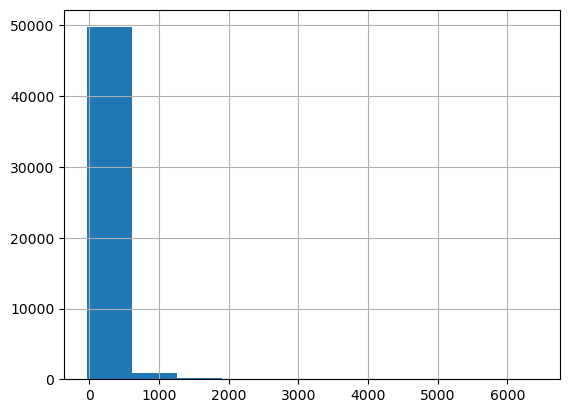

In [18]:
### we're finding negative values on arpu & arpu_3g & arpu2g, could be for people who don't pay their debts
df_train['arpu_2g'].hist()

### An idea of new feature could be the min of the arpu in the last months

In [20]:
#df_train['total_rech_data'].value_counts()

In [21]:
df_train['std_ic_t2o_mou'].value_counts()
### droping these variables becouse exist constant values
###  std_ic_t2o_mou & std_og_t2c_mou 

0.0    192202
Name: std_ic_t2o_mou, dtype: int64

##### Understanding the missing for future imputation

In [22]:
### % of missing values per feature
null_prc = (df_train.isnull().sum() / len(df_train)) * 100
null_prc

last_date_of_month        0.000000
arpu                      0.000000
onnet_mou                 3.608379
offnet_mou                3.608379
roam_ic_mou               3.608379
roam_og_mou               3.608379
loc_og_t2t_mou            3.608379
loc_og_t2m_mou            3.608379
loc_og_t2f_mou            3.608379
loc_og_t2c_mou            3.608379
loc_og_mou                3.608379
std_og_t2t_mou            3.608379
std_og_t2m_mou            3.608379
std_og_t2f_mou            3.608379
std_og_t2c_mou            3.608379
std_og_mou                3.608379
isd_og_mou                3.608379
spl_og_mou                3.608379
og_others                 3.608379
total_og_mou              0.000000
loc_ic_t2t_mou            3.608379
loc_ic_t2m_mou            3.608379
loc_ic_t2f_mou            3.608379
loc_ic_mou                3.608379
std_ic_t2t_mou            3.608379
std_ic_t2m_mou            3.608379
std_ic_t2f_mou            3.608379
std_ic_t2o_mou            3.608379
std_ic_mou          

In [23]:
df_train['count_rech_3g'].value_counts()

0.0     32082
1.0     13107
2.0      3259
3.0      1029
4.0       434
5.0       260
6.0       146
7.0       115
8.0        64
9.0        47
10.0       39
11.0       30
12.0       21
15.0       14
14.0       12
13.0       12
19.0        9
17.0        7
18.0        7
22.0        6
16.0        5
23.0        4
21.0        4
20.0        3
24.0        2
29.0        2
35.0        1
34.0        1
31.0        1
28.0        1
Name: count_rech_3g, dtype: int64

In [24]:
df_train['av_rech_amt_data'].value_counts()

154.0     7404
252.0     3758
198.0     2239
25.0      1787
98.0      1587
          ... 
966.0        1
2170.0       1
1861.0       1
1167.0       1
947.0        1
Name: av_rech_amt_data, Length: 1171, dtype: int64

In [25]:
df_train['arpu_2g'].describe()

count    50724.00000
mean             inf
std              inf
min        -35.84375
25%          0.00000
50%          9.96875
75%        122.06250
max       6432.00000
Name: arpu_2g, dtype: float64

In [26]:
df_train['arpu_2g'].value_counts()

0.000000       14107
212.125000      2665
122.062500      1064
0.010002        1024
63.968750        812
               ...  
471.000000         1
1071.000000        1
501.750000         1
6.261719           1
9.093750           1
Name: arpu_2g, Length: 6362, dtype: int64

In [27]:
df_train['night_pck_user'].value_counts() ### imputing with 0

0.0    49504
1.0     1220
Name: night_pck_user, dtype: int64

In [28]:
df_train['fb_user'].value_counts() ## imputing with 0

1.0    46238
0.0     4486
Name: fb_user, dtype: int64

In [30]:
column_features = ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
                   'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
                   'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
                   'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
                   'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
                   'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
                   'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
                   'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
                   'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
                   'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
                   'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g',
                   'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
                   'fb_user', 'day_of_last_rech']
for x in df_train,df_oot:
    for col in column_features:
        x[col].fillna(0,inplace=True)

C:\Users\walte\AppData\Local\Temp\ipykernel_27136\796484532.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col].fillna(0,inplace=True)


##### Outliers

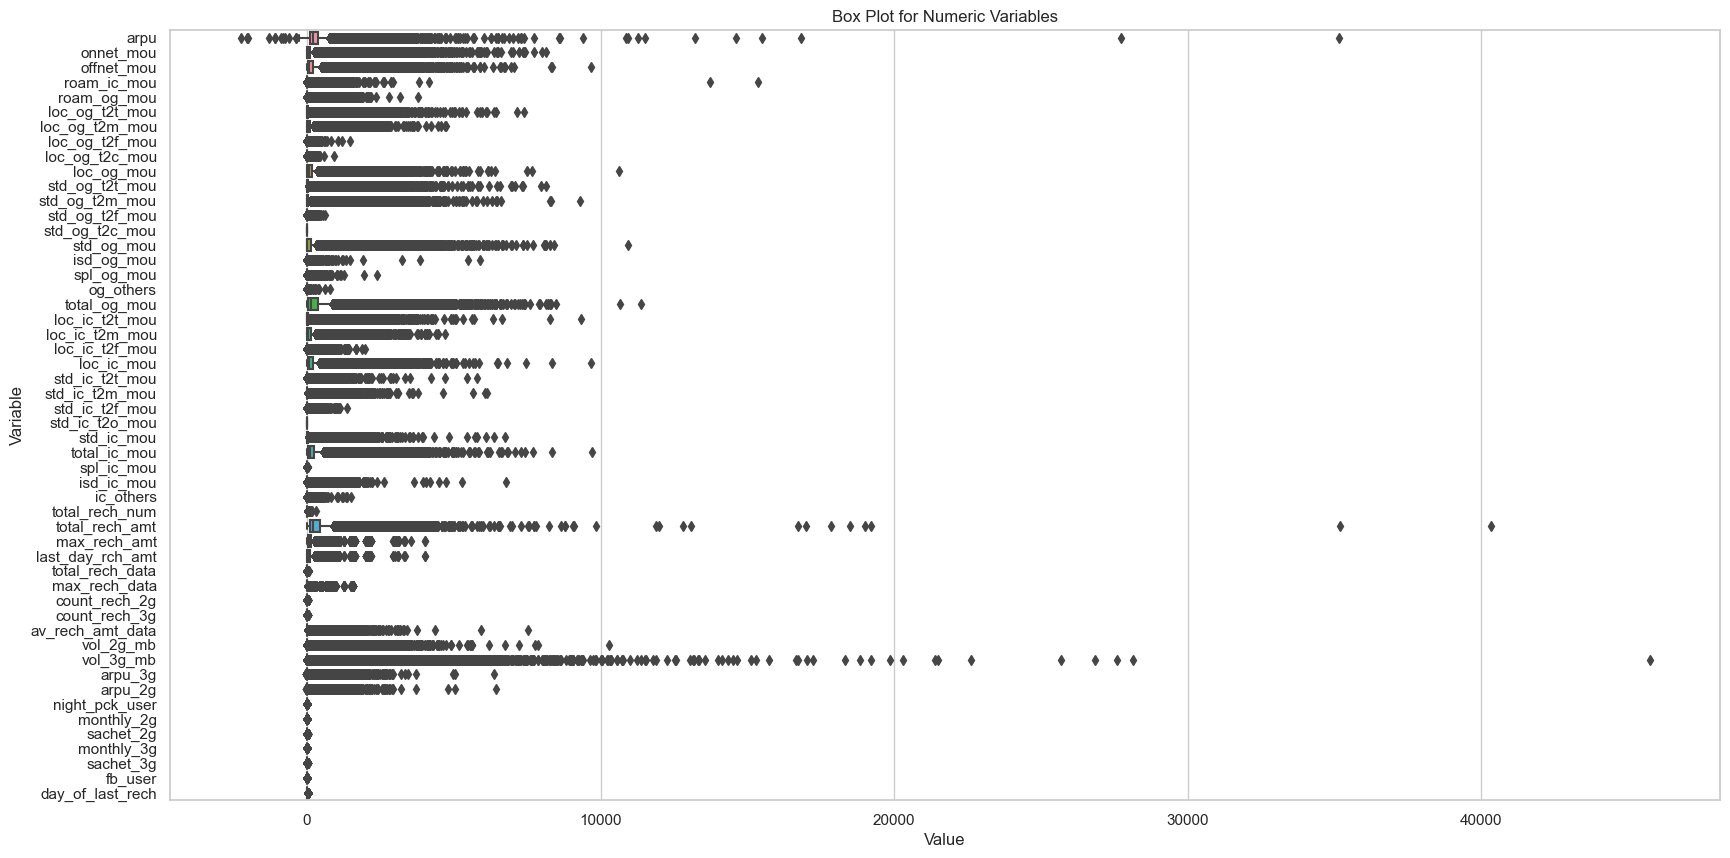

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for all numeric variables
sns.set(style="whitegrid")  # Set style for Seaborn plot

# Plot box plots for each numeric variable
plt.figure(figsize=(20, 10))  # Adjust the figure size
sns.boxplot(data=df_train[column_features], orient="h")  # Create horizontal box plots
plt.title("Box Plot for Numeric Variables")  # Set the title
plt.xlabel("Value")  # Label for the x-axis
plt.ylabel("Variable")  # Label for the y-axis
plt.show()

it's possible that this outliers could explain the attrition of the clientes for that we'll not make a capeo or replacing the outliers

#### Casteo de variables

In [32]:
for x in df_train, df_oot:
    x['last_date_of_month'] = x['last_date_of_month'].astype(str)
    x['last_date_of_month'] = x['last_date_of_month'].str[0:7]

C:\Users\walte\AppData\Local\Temp\ipykernel_27136\4148063594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['last_date_of_month'] = x['last_date_of_month'].astype(str)
C:\Users\walte\AppData\Local\Temp\ipykernel_27136\4148063594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['last_date_of_month'] = x['last_date_of_month'].str[0:7]


In [35]:
## Sort the information because the type of model,we'll modelate with july (2014-07), use the information of june (2014-06) and predict (2014-08

for x in df_train, df_oot:
    x = x.sort_values('last_date_of_month')

In [37]:
### Generando variables historicas (ultimo 2 meses)(junio-julio)

In [38]:
# List of features to aggregate
features_to_aggregate = column_features  

# Group by 'mobile_number' and aggregate the features
grouped_train = df_train.groupby('mobile_number').agg({
    feature: ['mean', 'max', 'min', 'std','median','first'] for feature in features_to_aggregate
})

# Reset the column names
grouped_train.columns = ['_'.join(col).strip() for col in grouped_train.columns.values]

# Reset the index to have 'mobile_number' as a regular column
grouped_train = grouped_train.reset_index()
grouped_train.head()

,mobile_number,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,onnet_mou_min,onnet_mou_std,onnet_mou_median,onnet_mou_first,offnet_mou_mean,offnet_mou_max,offnet_mou_min,offnet_mou_std,offnet_mou_median,offnet_mou_first,roam_ic_mou_mean,roam_ic_mou_max,roam_ic_mou_min,roam_ic_mou_std,roam_ic_mou_median,roam_ic_mou_first,roam_og_mou_mean,roam_og_mou_max,roam_og_mou_min,roam_og_mou_std,roam_og_mou_median,roam_og_mou_first,loc_og_t2t_mou_mean,loc_og_t2t_mou_max,loc_og_t2t_mou_min,loc_og_t2t_mou_std,loc_og_t2t_mou_median,loc_og_t2t_mou_first,loc_og_t2m_mou_mean,loc_og_t2m_mou_max,loc_og_t2m_mou_min,loc_og_t2m_mou_std,loc_og_t2m_mou_median,loc_og_t2m_mou_first,loc_og_t2f_mou_mean,loc_og_t2f_mou_max,loc_og_t2f_mou_min,loc_og_t2f_mou_std,loc_og_t2f_mou_median,loc_og_t2f_mou_first,loc_og_t2c_mou_mean,loc_og_t2c_mou_max,loc_og_t2c_mou_min,loc_og_t2c_mou_std,loc_og_t2c_mou_median,loc_og_t2c_mou_first,loc_og_mou_mean,loc_og_mou_max,loc_og_mou_min,loc_og_mou_std,loc_og_mou_median,loc_og_mou_first,std_og_t2t_mou_mean,std_og_t2t_mou_max,std_og_t2t_mou_min,std_og_t2t_mou_std,std_og_t2t_mou_median,std_og_t2t_mou_first,std_og_t2m_mou_mean,std_og_t2m_mou_max,std_og_t2m_mou_min,std_og_t2m_mou_std,std_og_t2m_mou_median,std_og_t2m_mou_first,std_og_t2f_mou_mean,std_og_t2f_mou_max,std_og_t2f_mou_min,std_og_t2f_mou_std,std_og_t2f_mou_median,std_og_t2f_mou_first,std_og_t2c_mou_mean,std_og_t2c_mou_max,std_og_t2c_mou_min,std_og_t2c_mou_std,std_og_t2c_mou_median,std_og_t2c_mou_first,std_og_mou_mean,std_og_mou_max,std_og_mou_min,std_og_mou_std,std_og_mou_median,std_og_mou_first,isd_og_mou_mean,isd_og_mou_max,isd_og_mou_min,isd_og_mou_std,isd_og_mou_median,isd_og_mou_first,spl_og_mou_mean,spl_og_mou_max,spl_og_mou_min,spl_og_mou_std,spl_og_mou_median,spl_og_mou_first,og_others_mean,og_others_max,og_others_min,og_others_std,og_others_median,og_others_first,total_og_mou_mean,total_og_mou_max,total_og_mou_min,total_og_mou_std,total_og_mou_median,total_og_mou_first,loc_ic_t2t_mou_mean,loc_ic_t2t_mou_max,loc_ic_t2t_mou_min,loc_ic_t2t_mou_std,loc_ic_t2t_mou_median,loc_ic_t2t_mou_first,loc_ic_t2m_mou_mean,loc_ic_t2m_mou_max,loc_ic_t2m_mou_min,loc_ic_t2m_mou_std,loc_ic_t2m_mou_median,loc_ic_t2m_mou_first,loc_ic_t2f_mou_mean,loc_ic_t2f_mou_max,loc_ic_t2f_mou_min,loc_ic_t2f_mou_std,loc_ic_t2f_mou_median,loc_ic_t2f_mou_first,loc_ic_mou_mean,loc_ic_mou_max,loc_ic_mou_min,loc_ic_mou_std,loc_ic_mou_median,loc_ic_mou_first,std_ic_t2t_mou_mean,std_ic_t2t_mou_max,std_ic_t2t_mou_min,std_ic_t2t_mou_std,std_ic_t2t_mou_median,std_ic_t2t_mou_first,std_ic_t2m_mou_mean,std_ic_t2m_mou_max,std_ic_t2m_mou_min,std_ic_t2m_mou_std,std_ic_t2m_mou_median,std_ic_t2m_mou_first,std_ic_t2f_mou_mean,std_ic_t2f_mou_max,std_ic_t2f_mou_min,std_ic_t2f_mou_std,std_ic_t2f_mou_median,std_ic_t2f_mou_first,std_ic_t2o_mou_mean,std_ic_t2o_mou_max,std_ic_t2o_mou_min,std_ic_t2o_mou_std,std_ic_t2o_mou_median,std_ic_t2o_mou_first,std_ic_mou_mean,std_ic_mou_max,std_ic_mou_min,std_ic_mou_std,std_ic_mou_median,std_ic_mou_first,total_ic_mou_mean,total_ic_mou_max,total_ic_mou_min,total_ic_mou_std,total_ic_mou_median,total_ic_mou_first,spl_ic_mou_mean,spl_ic_mou_max,spl_ic_mou_min,spl_ic_mou_std,spl_ic_mou_median,spl_ic_mou_first,isd_ic_mou_mean,isd_ic_mou_max,isd_ic_mou_min,isd_ic_mou_std,isd_ic_mou_median,isd_ic_mou_first,ic_others_mean,ic_others_max,ic_others_min,ic_others_std,ic_others_median,ic_others_first,total_rech_num_mean,total_rech_num_max,total_rech_num_min,total_rech_num_std,total_rech_num_median,total_rech_num_first,total_rech_amt_mean,total_rech_amt_max,total_rech_amt_min,total_rech_amt_std,total_rech_amt_median,total_rech_amt_first,max_rech_amt_mean,max_rech_amt_max,max_rech_amt_min,max_rech_amt_std,max_rech_amt_median,max_rech_amt_first,last_day_rch_amt_mean,last_day_rch_amt_max,last_day_rch_amt_min,last_day_rch_amt_std,last_day_rch_amt_median,last_day_rch_amt_first,total_rech_data_mean,total_rech_data_max,total_rech_data_min,total_rech_data_std,total_rech

In [42]:
### Generando variables historicas para la prediccion (ultimo 2 meses)(parados en agosto)

In [41]:
# List of features to aggregate
features_to_aggregate = column_features  

# Group by 'mobile_number' and aggregate the features
grouped_oot = df_oot.groupby('mobile_number').agg({
    feature: ['mean', 'max', 'min', 'std','median','first'] for feature in features_to_aggregate
})

# Reset the column names
grouped_oot.columns = ['_'.join(col).strip() for col in grouped_oot.columns.values]

# Reset the index to have 'mobile_number' as a regular column
grouped_oot = grouped_oot.reset_index()
grouped_oot.head()

,mobile_number,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,onnet_mou_min,onnet_mou_std,onnet_mou_median,onnet_mou_first,offnet_mou_mean,offnet_mou_max,offnet_mou_min,offnet_mou_std,offnet_mou_median,offnet_mou_first,roam_ic_mou_mean,roam_ic_mou_max,roam_ic_mou_min,roam_ic_mou_std,roam_ic_mou_median,roam_ic_mou_first,roam_og_mou_mean,roam_og_mou_max,roam_og_mou_min,roam_og_mou_std,roam_og_mou_median,roam_og_mou_first,loc_og_t2t_mou_mean,loc_og_t2t_mou_max,loc_og_t2t_mou_min,loc_og_t2t_mou_std,loc_og_t2t_mou_median,loc_og_t2t_mou_first,loc_og_t2m_mou_mean,loc_og_t2m_mou_max,loc_og_t2m_mou_min,loc_og_t2m_mou_std,loc_og_t2m_mou_median,loc_og_t2m_mou_first,loc_og_t2f_mou_mean,loc_og_t2f_mou_max,loc_og_t2f_mou_min,loc_og_t2f_mou_std,loc_og_t2f_mou_median,loc_og_t2f_mou_first,loc_og_t2c_mou_mean,loc_og_t2c_mou_max,loc_og_t2c_mou_min,loc_og_t2c_mou_std,loc_og_t2c_mou_median,loc_og_t2c_mou_first,loc_og_mou_mean,loc_og_mou_max,loc_og_mou_min,loc_og_mou_std,loc_og_mou_median,loc_og_mou_first,std_og_t2t_mou_mean,std_og_t2t_mou_max,std_og_t2t_mou_min,std_og_t2t_mou_std,std_og_t2t_mou_median,std_og_t2t_mou_first,std_og_t2m_mou_mean,std_og_t2m_mou_max,std_og_t2m_mou_min,std_og_t2m_mou_std,std_og_t2m_mou_median,std_og_t2m_mou_first,std_og_t2f_mou_mean,std_og_t2f_mou_max,std_og_t2f_mou_min,std_og_t2f_mou_std,std_og_t2f_mou_median,std_og_t2f_mou_first,std_og_t2c_mou_mean,std_og_t2c_mou_max,std_og_t2c_mou_min,std_og_t2c_mou_std,std_og_t2c_mou_median,std_og_t2c_mou_first,std_og_mou_mean,std_og_mou_max,std_og_mou_min,std_og_mou_std,std_og_mou_median,std_og_mou_first,isd_og_mou_mean,isd_og_mou_max,isd_og_mou_min,isd_og_mou_std,isd_og_mou_median,isd_og_mou_first,spl_og_mou_mean,spl_og_mou_max,spl_og_mou_min,spl_og_mou_std,spl_og_mou_median,spl_og_mou_first,og_others_mean,og_others_max,og_others_min,og_others_std,og_others_median,og_others_first,total_og_mou_mean,total_og_mou_max,total_og_mou_min,total_og_mou_std,total_og_mou_median,total_og_mou_first,loc_ic_t2t_mou_mean,loc_ic_t2t_mou_max,loc_ic_t2t_mou_min,loc_ic_t2t_mou_std,loc_ic_t2t_mou_median,loc_ic_t2t_mou_first,loc_ic_t2m_mou_mean,loc_ic_t2m_mou_max,loc_ic_t2m_mou_min,loc_ic_t2m_mou_std,loc_ic_t2m_mou_median,loc_ic_t2m_mou_first,loc_ic_t2f_mou_mean,loc_ic_t2f_mou_max,loc_ic_t2f_mou_min,loc_ic_t2f_mou_std,loc_ic_t2f_mou_median,loc_ic_t2f_mou_first,loc_ic_mou_mean,loc_ic_mou_max,loc_ic_mou_min,loc_ic_mou_std,loc_ic_mou_median,loc_ic_mou_first,std_ic_t2t_mou_mean,std_ic_t2t_mou_max,std_ic_t2t_mou_min,std_ic_t2t_mou_std,std_ic_t2t_mou_median,std_ic_t2t_mou_first,std_ic_t2m_mou_mean,std_ic_t2m_mou_max,std_ic_t2m_mou_min,std_ic_t2m_mou_std,std_ic_t2m_mou_median,std_ic_t2m_mou_first,std_ic_t2f_mou_mean,std_ic_t2f_mou_max,std_ic_t2f_mou_min,std_ic_t2f_mou_std,std_ic_t2f_mou_median,std_ic_t2f_mou_first,std_ic_t2o_mou_mean,std_ic_t2o_mou_max,std_ic_t2o_mou_min,std_ic_t2o_mou_std,std_ic_t2o_mou_median,std_ic_t2o_mou_first,std_ic_mou_mean,std_ic_mou_max,std_ic_mou_min,std_ic_mou_std,std_ic_mou_median,std_ic_mou_first,total_ic_mou_mean,total_ic_mou_max,total_ic_mou_min,total_ic_mou_std,total_ic_mou_median,total_ic_mou_first,spl_ic_mou_mean,spl_ic_mou_max,spl_ic_mou_min,spl_ic_mou_std,spl_ic_mou_median,spl_ic_mou_first,isd_ic_mou_mean,isd_ic_mou_max,isd_ic_mou_min,isd_ic_mou_std,isd_ic_mou_median,isd_ic_mou_first,ic_others_mean,ic_others_max,ic_others_min,ic_others_std,ic_others_median,ic_others_first,total_rech_num_mean,total_rech_num_max,total_rech_num_min,total_rech_num_std,total_rech_num_median,total_rech_num_first,total_rech_amt_mean,total_rech_amt_max,total_rech_amt_min,total_rech_amt_std,total_rech_amt_median,total_rech_amt_first,max_rech_amt_mean,max_rech_amt_max,max_rech_amt_min,max_rech_amt_std,max_rech_amt_median,max_rech_amt_first,last_day_rch_amt_mean,last_day_rch_amt_max,last_day_rch_amt_min,last_day_rch_amt_std,last_day_rch_amt_median,last_day_rch_amt_first,total_rech_data_mean,total_rech_data_max,total_rech_data_min,total_rech_data_std,total_rech

In [107]:
df_oot[df_oot.mobile_number==7002398245]

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,...,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number,day_of_last_rech,day_of_last_rech_data
100160,2014-07,37.84375,18.234375,1.530273,0.0,0.0,18.234375,1.530273,0.0,0.0,...,0.0,0,0,0,0,0.0,1,7002398245,6.0,-1.0


In [108]:
df_oot.last_date_of_month.value_counts()

2014-07    99398
2014-08    98899
Name: last_date_of_month, dtype: int64

# 1. Modelamiento por cliente, data model= 2014-07

In [43]:
### Base de id's unicos del mes de julio
universe_train = df_train[df_train['last_date_of_month']=='2014-07'].groupby(['mobile_number'])['churn'].max().reset_index()
universe_train.head()

,mobile_number,churn
0,7000000074,0
1,7000000090,0
2,7000000126,0
3,7000000149,1
4,7000000223,0


In [44]:
### generando la base de predicción de agosto
universe_oot = df_oot[df_oot['last_date_of_month']=='2014-08'].groupby(['mobile_number'])['churn'].max().reset_index()
universe_oot.head()

,mobile_number,churn
0,7000000074,0
1,7000000090,0
2,7000000126,0
3,7000000223,0
4,7000000229,0


Revisando la calida de data

In [45]:
universe_train['mobile_number'].nunique(), len(universe_train)

(99398, 99398)

In [46]:
universe_oot['mobile_number'].nunique(), len(universe_oot)

(98899, 98899)

### Pegamos las variables generadas a las bases de modelamiento

In [48]:
universe_train = universe_train.merge(grouped_train, how = 'left',on = ['mobile_number'])
universe_train.shape

(99398, 314)

In [49]:
universe_oot = universe_oot.merge(grouped_oot, how = 'left',on = ['mobile_number'])
universe_oot.shape

(98899, 314)

In [50]:
universe_train.sample(1)

,mobile_number,churn,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,onnet_mou_min,onnet_mou_std,onnet_mou_median,onnet_mou_first,offnet_mou_mean,offnet_mou_max,offnet_mou_min,offnet_mou_std,offnet_mou_median,offnet_mou_first,roam_ic_mou_mean,roam_ic_mou_max,roam_ic_mou_min,roam_ic_mou_std,roam_ic_mou_median,roam_ic_mou_first,roam_og_mou_mean,roam_og_mou_max,roam_og_mou_min,roam_og_mou_std,roam_og_mou_median,roam_og_mou_first,loc_og_t2t_mou_mean,loc_og_t2t_mou_max,loc_og_t2t_mou_min,loc_og_t2t_mou_std,loc_og_t2t_mou_median,loc_og_t2t_mou_first,loc_og_t2m_mou_mean,loc_og_t2m_mou_max,loc_og_t2m_mou_min,loc_og_t2m_mou_std,loc_og_t2m_mou_median,loc_og_t2m_mou_first,loc_og_t2f_mou_mean,loc_og_t2f_mou_max,loc_og_t2f_mou_min,loc_og_t2f_mou_std,loc_og_t2f_mou_median,loc_og_t2f_mou_first,loc_og_t2c_mou_mean,loc_og_t2c_mou_max,loc_og_t2c_mou_min,loc_og_t2c_mou_std,loc_og_t2c_mou_median,loc_og_t2c_mou_first,loc_og_mou_mean,loc_og_mou_max,loc_og_mou_min,loc_og_mou_std,loc_og_mou_median,loc_og_mou_first,std_og_t2t_mou_mean,std_og_t2t_mou_max,std_og_t2t_mou_min,std_og_t2t_mou_std,std_og_t2t_mou_median,std_og_t2t_mou_first,std_og_t2m_mou_mean,std_og_t2m_mou_max,std_og_t2m_mou_min,std_og_t2m_mou_std,std_og_t2m_mou_median,std_og_t2m_mou_first,std_og_t2f_mou_mean,std_og_t2f_mou_max,std_og_t2f_mou_min,std_og_t2f_mou_std,std_og_t2f_mou_median,std_og_t2f_mou_first,std_og_t2c_mou_mean,std_og_t2c_mou_max,std_og_t2c_mou_min,std_og_t2c_mou_std,std_og_t2c_mou_median,std_og_t2c_mou_first,std_og_mou_mean,std_og_mou_max,std_og_mou_min,std_og_mou_std,std_og_mou_median,std_og_mou_first,isd_og_mou_mean,isd_og_mou_max,isd_og_mou_min,isd_og_mou_std,isd_og_mou_median,isd_og_mou_first,spl_og_mou_mean,spl_og_mou_max,spl_og_mou_min,spl_og_mou_std,spl_og_mou_median,spl_og_mou_first,og_others_mean,og_others_max,og_others_min,og_others_std,og_others_median,og_others_first,total_og_mou_mean,total_og_mou_max,total_og_mou_min,total_og_mou_std,total_og_mou_median,total_og_mou_first,loc_ic_t2t_mou_mean,loc_ic_t2t_mou_max,loc_ic_t2t_mou_min,loc_ic_t2t_mou_std,loc_ic_t2t_mou_median,loc_ic_t2t_mou_first,loc_ic_t2m_mou_mean,loc_ic_t2m_mou_max,loc_ic_t2m_mou_min,loc_ic_t2m_mou_std,loc_ic_t2m_mou_median,loc_ic_t2m_mou_first,loc_ic_t2f_mou_mean,loc_ic_t2f_mou_max,loc_ic_t2f_mou_min,loc_ic_t2f_mou_std,loc_ic_t2f_mou_median,loc_ic_t2f_mou_first,loc_ic_mou_mean,loc_ic_mou_max,loc_ic_mou_min,loc_ic_mou_std,loc_ic_mou_median,loc_ic_mou_first,std_ic_t2t_mou_mean,std_ic_t2t_mou_max,std_ic_t2t_mou_min,std_ic_t2t_mou_std,std_ic_t2t_mou_median,std_ic_t2t_mou_first,std_ic_t2m_mou_mean,std_ic_t2m_mou_max,std_ic_t2m_mou_min,std_ic_t2m_mou_std,std_ic_t2m_mou_median,std_ic_t2m_mou_first,std_ic_t2f_mou_mean,std_ic_t2f_mou_max,std_ic_t2f_mou_min,std_ic_t2f_mou_std,std_ic_t2f_mou_median,std_ic_t2f_mou_first,std_ic_t2o_mou_mean,std_ic_t2o_mou_max,std_ic_t2o_mou_min,std_ic_t2o_mou_std,std_ic_t2o_mou_median,std_ic_t2o_mou_first,std_ic_mou_mean,std_ic_mou_max,std_ic_mou_min,std_ic_mou_std,std_ic_mou_median,std_ic_mou_first,total_ic_mou_mean,total_ic_mou_max,total_ic_mou_min,total_ic_mou_std,total_ic_mou_median,total_ic_mou_first,spl_ic_mou_mean,spl_ic_mou_max,spl_ic_mou_min,spl_ic_mou_std,spl_ic_mou_median,spl_ic_mou_first,isd_ic_mou_mean,isd_ic_mou_max,isd_ic_mou_min,isd_ic_mou_std,isd_ic_mou_median,isd_ic_mou_first,ic_others_mean,ic_others_max,ic_others_min,ic_others_std,ic_others_median,ic_others_first,total_rech_num_mean,total_rech_num_max,total_rech_num_min,total_rech_num_std,total_rech_num_median,total_rech_num_first,total_rech_amt_mean,total_rech_amt_max,total_rech_amt_min,total_rech_amt_std,total_rech_amt_median,total_rech_amt_first,max_rech_amt_mean,max_rech_amt_max,max_rech_amt_min,max_rech_amt_std,max_rech_amt_median,max_rech_amt_first,last_day_rch_amt_mean,last_day_rch_amt_max,last_day_rch_amt_min,last_day_rch_amt_std,last_day_rch_amt_median,last_day_rch_amt_first,total_rech_data_mean,total_rech_data_max,total_rech_data_min,total_rech_data_std,tota

In [52]:
universe_oot.sample(1)

,mobile_number,churn,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,onnet_mou_min,onnet_mou_std,onnet_mou_median,onnet_mou_first,offnet_mou_mean,offnet_mou_max,offnet_mou_min,offnet_mou_std,offnet_mou_median,offnet_mou_first,roam_ic_mou_mean,roam_ic_mou_max,roam_ic_mou_min,roam_ic_mou_std,roam_ic_mou_median,roam_ic_mou_first,roam_og_mou_mean,roam_og_mou_max,roam_og_mou_min,roam_og_mou_std,roam_og_mou_median,roam_og_mou_first,loc_og_t2t_mou_mean,loc_og_t2t_mou_max,loc_og_t2t_mou_min,loc_og_t2t_mou_std,loc_og_t2t_mou_median,loc_og_t2t_mou_first,loc_og_t2m_mou_mean,loc_og_t2m_mou_max,loc_og_t2m_mou_min,loc_og_t2m_mou_std,loc_og_t2m_mou_median,loc_og_t2m_mou_first,loc_og_t2f_mou_mean,loc_og_t2f_mou_max,loc_og_t2f_mou_min,loc_og_t2f_mou_std,loc_og_t2f_mou_median,loc_og_t2f_mou_first,loc_og_t2c_mou_mean,loc_og_t2c_mou_max,loc_og_t2c_mou_min,loc_og_t2c_mou_std,loc_og_t2c_mou_median,loc_og_t2c_mou_first,loc_og_mou_mean,loc_og_mou_max,loc_og_mou_min,loc_og_mou_std,loc_og_mou_median,loc_og_mou_first,std_og_t2t_mou_mean,std_og_t2t_mou_max,std_og_t2t_mou_min,std_og_t2t_mou_std,std_og_t2t_mou_median,std_og_t2t_mou_first,std_og_t2m_mou_mean,std_og_t2m_mou_max,std_og_t2m_mou_min,std_og_t2m_mou_std,std_og_t2m_mou_median,std_og_t2m_mou_first,std_og_t2f_mou_mean,std_og_t2f_mou_max,std_og_t2f_mou_min,std_og_t2f_mou_std,std_og_t2f_mou_median,std_og_t2f_mou_first,std_og_t2c_mou_mean,std_og_t2c_mou_max,std_og_t2c_mou_min,std_og_t2c_mou_std,std_og_t2c_mou_median,std_og_t2c_mou_first,std_og_mou_mean,std_og_mou_max,std_og_mou_min,std_og_mou_std,std_og_mou_median,std_og_mou_first,isd_og_mou_mean,isd_og_mou_max,isd_og_mou_min,isd_og_mou_std,isd_og_mou_median,isd_og_mou_first,spl_og_mou_mean,spl_og_mou_max,spl_og_mou_min,spl_og_mou_std,spl_og_mou_median,spl_og_mou_first,og_others_mean,og_others_max,og_others_min,og_others_std,og_others_median,og_others_first,total_og_mou_mean,total_og_mou_max,total_og_mou_min,total_og_mou_std,total_og_mou_median,total_og_mou_first,loc_ic_t2t_mou_mean,loc_ic_t2t_mou_max,loc_ic_t2t_mou_min,loc_ic_t2t_mou_std,loc_ic_t2t_mou_median,loc_ic_t2t_mou_first,loc_ic_t2m_mou_mean,loc_ic_t2m_mou_max,loc_ic_t2m_mou_min,loc_ic_t2m_mou_std,loc_ic_t2m_mou_median,loc_ic_t2m_mou_first,loc_ic_t2f_mou_mean,loc_ic_t2f_mou_max,loc_ic_t2f_mou_min,loc_ic_t2f_mou_std,loc_ic_t2f_mou_median,loc_ic_t2f_mou_first,loc_ic_mou_mean,loc_ic_mou_max,loc_ic_mou_min,loc_ic_mou_std,loc_ic_mou_median,loc_ic_mou_first,std_ic_t2t_mou_mean,std_ic_t2t_mou_max,std_ic_t2t_mou_min,std_ic_t2t_mou_std,std_ic_t2t_mou_median,std_ic_t2t_mou_first,std_ic_t2m_mou_mean,std_ic_t2m_mou_max,std_ic_t2m_mou_min,std_ic_t2m_mou_std,std_ic_t2m_mou_median,std_ic_t2m_mou_first,std_ic_t2f_mou_mean,std_ic_t2f_mou_max,std_ic_t2f_mou_min,std_ic_t2f_mou_std,std_ic_t2f_mou_median,std_ic_t2f_mou_first,std_ic_t2o_mou_mean,std_ic_t2o_mou_max,std_ic_t2o_mou_min,std_ic_t2o_mou_std,std_ic_t2o_mou_median,std_ic_t2o_mou_first,std_ic_mou_mean,std_ic_mou_max,std_ic_mou_min,std_ic_mou_std,std_ic_mou_median,std_ic_mou_first,total_ic_mou_mean,total_ic_mou_max,total_ic_mou_min,total_ic_mou_std,total_ic_mou_median,total_ic_mou_first,spl_ic_mou_mean,spl_ic_mou_max,spl_ic_mou_min,spl_ic_mou_std,spl_ic_mou_median,spl_ic_mou_first,isd_ic_mou_mean,isd_ic_mou_max,isd_ic_mou_min,isd_ic_mou_std,isd_ic_mou_median,isd_ic_mou_first,ic_others_mean,ic_others_max,ic_others_min,ic_others_std,ic_others_median,ic_others_first,total_rech_num_mean,total_rech_num_max,total_rech_num_min,total_rech_num_std,total_rech_num_median,total_rech_num_first,total_rech_amt_mean,total_rech_amt_max,total_rech_amt_min,total_rech_amt_std,total_rech_amt_median,total_rech_amt_first,max_rech_amt_mean,max_rech_amt_max,max_rech_amt_min,max_rech_amt_std,max_rech_amt_median,max_rech_amt_first,last_day_rch_amt_mean,last_day_rch_amt_max,last_day_rch_amt_min,last_day_rch_amt_std,last_day_rch_amt_median,last_day_rch_amt_first,total_rech_data_mean,total_rech_data_max,total_rech_data_min,total_rech_data_std,tota

##### Feature selection using analysis Bivariado (Gini x variable)

In [53]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

def calculate_roc_auc_for_columns_binary(df, target_column, columns_of_interest):
    """
    Calculate ROC AUC scores for specified columns in a DataFrame for binary classification.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_column (str): Name of the binary target column (0 or 1).
    columns_of_interest (list): List of column names to calculate ROC AUC for.

    Returns:
    pd.DataFrame: DataFrame containing the ROC AUC scores for each column.
    """
    roc_auc_scores = {}

    # Calculate ROC AUC for each column
    for col in columns_of_interest:
        target = df[target_column]
        roc_auc = roc_auc_score(target, df[col])
        roc_auc_scores[col] = roc_auc

    # Convert the dictionary to a DataFrame
    roc_auc_df = pd.DataFrame(roc_auc_scores.items(), columns=["Feature", "ROC_AUC"])
    
    return roc_auc_df

# Example usage:
# Assuming your DataFrame is named 'train2' and you want to calculate ROC AUC for specific columns
target_column = 'churn'  # Change this to the name of your binary target column
columns_of_interest = universe_train.drop(columns=['mobile_number', 'churn'], axis=1).columns
roc_auc_df = calculate_roc_auc_for_columns_binary(universe_train, target_column, columns_of_interest)

# Print or use the DataFrame
roc_auc_df.head()

,Feature,ROC_AUC
0,arpu_mean,0.427148
1,arpu_max,0.514997
2,arpu_min,0.260428
3,arpu_std,0.719276
4,arpu_median,0.427148


In [54]:
roc_auc_df['GINI']= roc_auc_df['ROC_AUC']*2-1

In [55]:
roc_auc_df.sort_values('GINI', ascending=False)

,Feature,ROC_AUC,GINI
3,arpu_std,0.719276,0.438553
307,day_of_last_rech_max,0.715779,0.431557
309,day_of_last_rech_std,0.699020,0.398041
310,day_of_last_rech_median,0.689034,0.378067
306,day_of_last_rech_mean,0.689034,0.378067
207,max_rech_amt_std,0.668023,0.336046
311,day_of_last_rech_first,0.667304,0.334608
201,total_rech_amt_std,0.660243,0.320487
195,total_rech_num_std,0.600698,0.201395
111,total_og_mou_std,0.587525,0.175050


In [56]:
roc_auc_df[roc_auc_df['ROC_AUC']>0.5]['Feature'].unique()

array(['arpu_max', 'arpu_std', 'onnet_mou_std', 'offnet_mou_std',
       'roam_ic_mou_mean', 'roam_ic_mou_max', 'roam_ic_mou_std',
       'roam_ic_mou_median', 'roam_og_mou_mean', 'roam_og_mou_max',
       'roam_og_mou_std', 'roam_og_mou_median', 'loc_og_mou_std',
       'std_og_t2t_mou_std', 'std_og_t2m_mou_std', 'std_og_mou_std',
       'isd_og_mou_mean', 'isd_og_mou_max', 'isd_og_mou_std',
       'isd_og_mou_median', 'og_others_mean', 'og_others_max',
       'og_others_min', 'og_others_std', 'og_others_median',
       'total_og_mou_std', 'total_ic_mou_std', 'total_rech_num_std',
       'total_rech_amt_std', 'max_rech_amt_std', 'last_day_rch_amt_std',
       'total_rech_data_std', 'max_rech_data_std', 'count_rech_3g_mean',
       'count_rech_3g_max', 'count_rech_3g_std', 'count_rech_3g_median',
       'av_rech_amt_data_std', 'monthly_3g_mean', 'monthly_3g_max',
       'monthly_3g_std', 'monthly_3g_median', 'fb_user_std',
       'day_of_last_rech_mean', 'day_of_last_rech_max',
       

In [57]:
columns_pass = ['arpu_max', 'arpu_std', 'onnet_mou_std', 'offnet_mou_std',
       'roam_ic_mou_mean', 'roam_ic_mou_max', 'roam_ic_mou_std',
       'roam_ic_mou_median', 'roam_og_mou_mean', 'roam_og_mou_max',
       'roam_og_mou_std', 'roam_og_mou_median', 'loc_og_mou_std',
       'std_og_t2t_mou_std', 'std_og_t2m_mou_std', 'std_og_mou_std',
       'isd_og_mou_mean', 'isd_og_mou_max', 'isd_og_mou_std',
       'isd_og_mou_median', 'og_others_mean', 'og_others_max',
       'og_others_min', 'og_others_std', 'og_others_median',
       'total_og_mou_std', 'total_ic_mou_std', 'total_rech_num_std',
       'total_rech_amt_std', 'max_rech_amt_std', 'last_day_rch_amt_std',
       'total_rech_data_std', 'max_rech_data_std', 'count_rech_3g_mean',
       'count_rech_3g_max', 'count_rech_3g_std', 'count_rech_3g_median',
       'av_rech_amt_data_std', 'monthly_3g_mean', 'monthly_3g_max',
       'monthly_3g_std', 'monthly_3g_median', 'fb_user_std',
       'day_of_last_rech_mean', 'day_of_last_rech_max',
       'day_of_last_rech_min', 'day_of_last_rech_std',
       'day_of_last_rech_median', 'day_of_last_rech_first'] 

##### Feature selection Multivariado  (Random Forest Selector) 

In [58]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [59]:
universe_train.head()

,mobile_number,churn,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,onnet_mou_min,onnet_mou_std,onnet_mou_median,onnet_mou_first,offnet_mou_mean,offnet_mou_max,offnet_mou_min,offnet_mou_std,offnet_mou_median,offnet_mou_first,roam_ic_mou_mean,roam_ic_mou_max,roam_ic_mou_min,roam_ic_mou_std,roam_ic_mou_median,roam_ic_mou_first,roam_og_mou_mean,roam_og_mou_max,roam_og_mou_min,roam_og_mou_std,roam_og_mou_median,roam_og_mou_first,loc_og_t2t_mou_mean,loc_og_t2t_mou_max,loc_og_t2t_mou_min,loc_og_t2t_mou_std,loc_og_t2t_mou_median,loc_og_t2t_mou_first,loc_og_t2m_mou_mean,loc_og_t2m_mou_max,loc_og_t2m_mou_min,loc_og_t2m_mou_std,loc_og_t2m_mou_median,loc_og_t2m_mou_first,loc_og_t2f_mou_mean,loc_og_t2f_mou_max,loc_og_t2f_mou_min,loc_og_t2f_mou_std,loc_og_t2f_mou_median,loc_og_t2f_mou_first,loc_og_t2c_mou_mean,loc_og_t2c_mou_max,loc_og_t2c_mou_min,loc_og_t2c_mou_std,loc_og_t2c_mou_median,loc_og_t2c_mou_first,loc_og_mou_mean,loc_og_mou_max,loc_og_mou_min,loc_og_mou_std,loc_og_mou_median,loc_og_mou_first,std_og_t2t_mou_mean,std_og_t2t_mou_max,std_og_t2t_mou_min,std_og_t2t_mou_std,std_og_t2t_mou_median,std_og_t2t_mou_first,std_og_t2m_mou_mean,std_og_t2m_mou_max,std_og_t2m_mou_min,std_og_t2m_mou_std,std_og_t2m_mou_median,std_og_t2m_mou_first,std_og_t2f_mou_mean,std_og_t2f_mou_max,std_og_t2f_mou_min,std_og_t2f_mou_std,std_og_t2f_mou_median,std_og_t2f_mou_first,std_og_t2c_mou_mean,std_og_t2c_mou_max,std_og_t2c_mou_min,std_og_t2c_mou_std,std_og_t2c_mou_median,std_og_t2c_mou_first,std_og_mou_mean,std_og_mou_max,std_og_mou_min,std_og_mou_std,std_og_mou_median,std_og_mou_first,isd_og_mou_mean,isd_og_mou_max,isd_og_mou_min,isd_og_mou_std,isd_og_mou_median,isd_og_mou_first,spl_og_mou_mean,spl_og_mou_max,spl_og_mou_min,spl_og_mou_std,spl_og_mou_median,spl_og_mou_first,og_others_mean,og_others_max,og_others_min,og_others_std,og_others_median,og_others_first,total_og_mou_mean,total_og_mou_max,total_og_mou_min,total_og_mou_std,total_og_mou_median,total_og_mou_first,loc_ic_t2t_mou_mean,loc_ic_t2t_mou_max,loc_ic_t2t_mou_min,loc_ic_t2t_mou_std,loc_ic_t2t_mou_median,loc_ic_t2t_mou_first,loc_ic_t2m_mou_mean,loc_ic_t2m_mou_max,loc_ic_t2m_mou_min,loc_ic_t2m_mou_std,loc_ic_t2m_mou_median,loc_ic_t2m_mou_first,loc_ic_t2f_mou_mean,loc_ic_t2f_mou_max,loc_ic_t2f_mou_min,loc_ic_t2f_mou_std,loc_ic_t2f_mou_median,loc_ic_t2f_mou_first,loc_ic_mou_mean,loc_ic_mou_max,loc_ic_mou_min,loc_ic_mou_std,loc_ic_mou_median,loc_ic_mou_first,std_ic_t2t_mou_mean,std_ic_t2t_mou_max,std_ic_t2t_mou_min,std_ic_t2t_mou_std,std_ic_t2t_mou_median,std_ic_t2t_mou_first,std_ic_t2m_mou_mean,std_ic_t2m_mou_max,std_ic_t2m_mou_min,std_ic_t2m_mou_std,std_ic_t2m_mou_median,std_ic_t2m_mou_first,std_ic_t2f_mou_mean,std_ic_t2f_mou_max,std_ic_t2f_mou_min,std_ic_t2f_mou_std,std_ic_t2f_mou_median,std_ic_t2f_mou_first,std_ic_t2o_mou_mean,std_ic_t2o_mou_max,std_ic_t2o_mou_min,std_ic_t2o_mou_std,std_ic_t2o_mou_median,std_ic_t2o_mou_first,std_ic_mou_mean,std_ic_mou_max,std_ic_mou_min,std_ic_mou_std,std_ic_mou_median,std_ic_mou_first,total_ic_mou_mean,total_ic_mou_max,total_ic_mou_min,total_ic_mou_std,total_ic_mou_median,total_ic_mou_first,spl_ic_mou_mean,spl_ic_mou_max,spl_ic_mou_min,spl_ic_mou_std,spl_ic_mou_median,spl_ic_mou_first,isd_ic_mou_mean,isd_ic_mou_max,isd_ic_mou_min,isd_ic_mou_std,isd_ic_mou_median,isd_ic_mou_first,ic_others_mean,ic_others_max,ic_others_min,ic_others_std,ic_others_median,ic_others_first,total_rech_num_mean,total_rech_num_max,total_rech_num_min,total_rech_num_std,total_rech_num_median,total_rech_num_first,total_rech_amt_mean,total_rech_amt_max,total_rech_amt_min,total_rech_amt_std,total_rech_amt_median,total_rech_amt_first,max_rech_amt_mean,max_rech_amt_max,max_rech_amt_min,max_rech_amt_std,max_rech_amt_median,max_rech_amt_first,last_day_rch_amt_mean,last_day_rch_amt_max,last_day_rch_amt_min,last_day_rch_amt_std,last_day_rch_amt_median,last_day_rch_amt_first,total_rech_data_mean,total_rech_data_max,total_rech_data_min,total_rech_data_std,tota

In [60]:
universe_train[columns_pass].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99398 entries, 0 to 99397
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arpu_max                 99398 non-null  float16
 1   arpu_std                 99398 non-null  float64
 2   onnet_mou_std            99398 non-null  float64
 3   offnet_mou_std           99398 non-null  float64
 4   roam_ic_mou_mean         99398 non-null  float16
 5   roam_ic_mou_max          99398 non-null  float16
 6   roam_ic_mou_std          99398 non-null  float64
 7   roam_ic_mou_median       99398 non-null  float16
 8   roam_og_mou_mean         99398 non-null  float16
 9   roam_og_mou_max          99398 non-null  float16
 10  roam_og_mou_std          99398 non-null  float64
 11  roam_og_mou_median       99398 non-null  float16
 12  loc_og_mou_std           99398 non-null  float64
 13  std_og_t2t_mou_std       99398 non-null  float64
 14  std_og_t2m_mou_std    

In [61]:
# Create a DataFrame containing only the selected columns
universe_train_selected = universe_train[columns_pass]

y_train = universe_train['churn'] 
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the selected features
rf_classifier.fit(universe_train_selected, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': universe_train_selected.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or use the importance DataFrame
importance_df

,Feature,Importance
1,arpu_std,0.062104
0,arpu_max,0.060981
26,total_ic_mou_std,0.048983
48,day_of_last_rech_first,0.044795
3,offnet_mou_std,0.041806
25,total_og_mou_std,0.041593
12,loc_og_mou_std,0.041522
2,onnet_mou_std,0.039845
28,total_rech_amt_std,0.039359
27,total_rech_num_std,0.034528


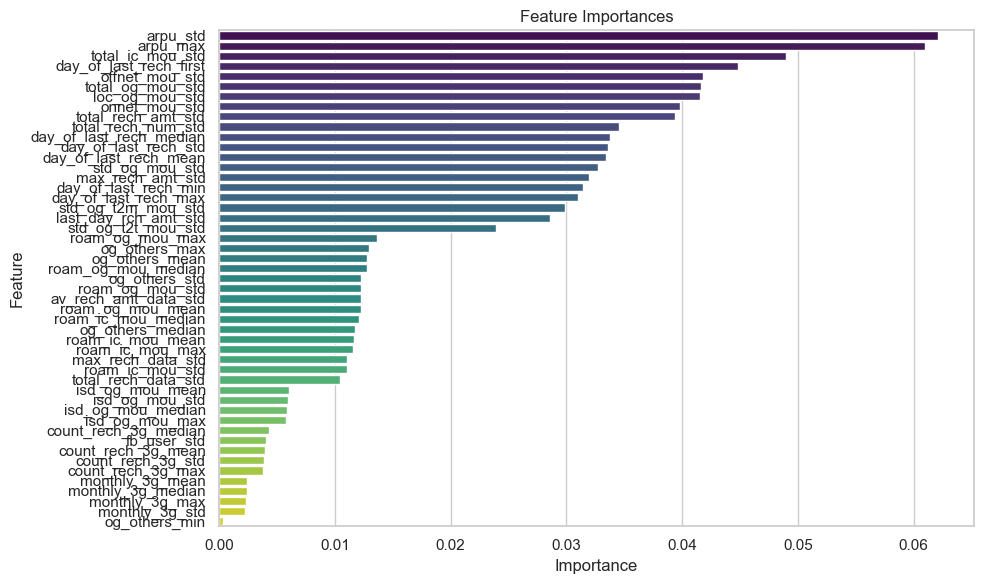

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already created 'importance_df' as in your code

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [64]:
importance_df[importance_df['Importance']>=0.005]['Feature'].nunique()

39

In [65]:
importance_df_selected_columns = ['arpu_std', 'arpu_max', 'total_ic_mou_std',
       'day_of_last_rech_first', 'offnet_mou_std', 'total_og_mou_std',
       'loc_og_mou_std', 'onnet_mou_std', 'total_rech_amt_std',
       'total_rech_num_std', 'day_of_last_rech_median',
       'day_of_last_rech_std', 'day_of_last_rech_mean', 'std_og_mou_std',
       'max_rech_amt_std', 'day_of_last_rech_min', 'day_of_last_rech_max',
       'std_og_t2m_mou_std', 'last_day_rch_amt_std', 'std_og_t2t_mou_std',
       'roam_og_mou_max', 'og_others_max', 'og_others_mean',
       'roam_og_mou_median', 'og_others_std', 'roam_og_mou_std',
       'av_rech_amt_data_std', 'roam_og_mou_mean', 'roam_ic_mou_median',
       'og_others_median', 'roam_ic_mou_mean', 'roam_ic_mou_max',
       'max_rech_data_std', 'roam_ic_mou_std', 'total_rech_data_std',
       'isd_og_mou_mean', 'isd_og_mou_std', 'isd_og_mou_median',
       'isd_og_mou_max']

In [66]:
importance_df_selected = importance_df[importance_df['Importance']>=0.005]

In [67]:
importance_df_selected

,Feature,Importance,Cumulative Importance
1,arpu_std,0.062104,0.062104
0,arpu_max,0.060981,0.123085
26,total_ic_mou_std,0.048983,0.172068
48,day_of_last_rech_first,0.044795,0.216862
3,offnet_mou_std,0.041806,0.258668
25,total_og_mou_std,0.041593,0.300261
12,loc_og_mou_std,0.041522,0.341783
2,onnet_mou_std,0.039845,0.381628
28,total_rech_amt_std,0.039359,0.420987
27,total_rech_num_std,0.034528,0.455515


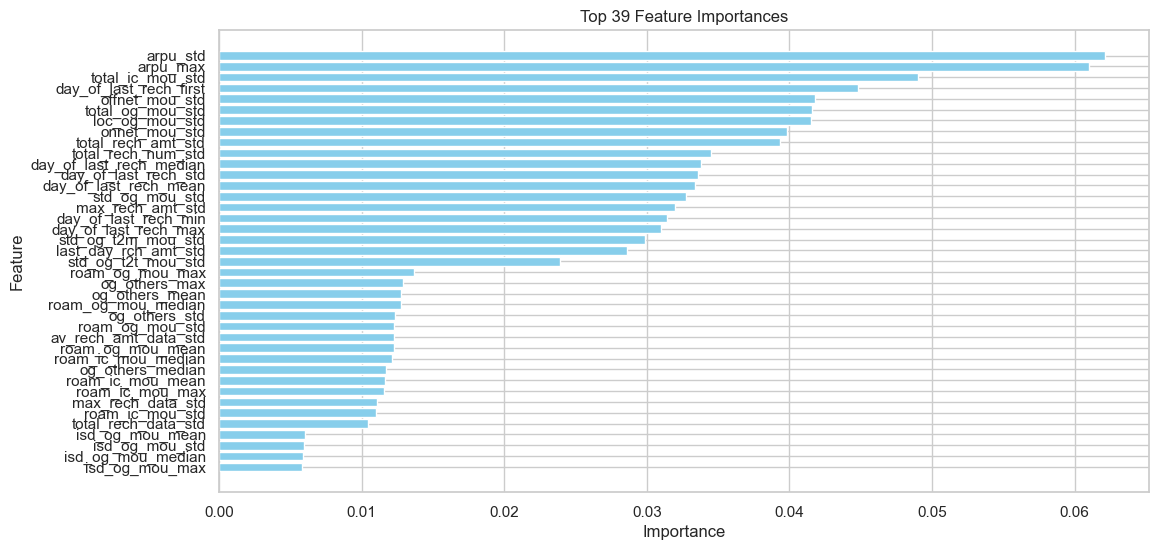

In [68]:
## grafica de las variables después del filtro
import matplotlib.pyplot as plt

N = 39  # Change this to the number of top features you want to plot

# Sort the DataFrame by importance in descending order and select the top N
top_features = importance_df_selected.sort_values(by='Importance', ascending=False).head(N)

# Create a bar plot for the top N features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {N} Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important at the top
plt.show()

#### Filtro de correlaciones

In [69]:
# Calculate the pairwise correlation matrix among the selected features
correlation_matrix = universe_train[importance_df_selected_columns+['churn']].corr()

# Identify features with correlation > 0.8 with any other feature
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

# Print or use the highly correlated feature pairs and their correlation values
for pair in highly_correlated_pairs:
    print(f"Features '{pair[0]}' and '{pair[1]}' have correlation: {pair[2]:.2f}")

Features 'day_of_last_rech_mean' and 'day_of_last_rech_median' have correlation: 1.00
Features 'day_of_last_rech_max' and 'day_of_last_rech_median' have correlation: 0.94
Features 'day_of_last_rech_max' and 'day_of_last_rech_mean' have correlation: 0.94
Features 'og_others_mean' and 'og_others_max' have correlation: 0.98
Features 'roam_og_mou_median' and 'roam_og_mou_max' have correlation: 0.97
Features 'og_others_std' and 'og_others_max' have correlation: 0.97
Features 'og_others_std' and 'og_others_mean' have correlation: 0.91
Features 'roam_og_mou_std' and 'roam_og_mou_max' have correlation: 0.91
Features 'roam_og_mou_mean' and 'roam_og_mou_max' have correlation: 0.97
Features 'roam_og_mou_mean' and 'roam_og_mou_median' have correlation: 1.00
Features 'og_others_median' and 'og_others_max' have correlation: 0.98
Features 'og_others_median' and 'og_others_mean' have correlation: 1.00
Features 'og_others_median' and 'og_others_std' have correlation: 0.91
Features 'roam_ic_mou_mean' an

In [70]:
# Calculate the pairwise correlation matrix among the selected features
correlation_matrix = universe_train[importance_df_selected_columns + ['churn']].corr()

# Set the correlation threshold (e.g., 0.9)
correlation_threshold = 0.9

# Identify features with correlation > correlation_threshold with any other feature
highly_correlated_columns = set()  # Use a set to store unique column names

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_columns.add(colname_i)
            highly_correlated_columns.add(colname_j)

# Convert the set of highly correlated columns to a list
highly_correlated_columns_list = list(highly_correlated_columns)

# Print or use the list of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns_list)


Highly correlated columns: ['og_others_mean', 'roam_og_mou_std', 'day_of_last_rech_mean', 'roam_og_mou_max', 'og_others_std', 'roam_ic_mou_max', 'roam_og_mou_median', 'og_others_max', 'roam_ic_mou_median', 'roam_og_mou_mean', 'isd_og_mou_median', 'isd_og_mou_mean', 'day_of_last_rech_max', 'og_others_median', 'day_of_last_rech_median', 'roam_ic_mou_mean', 'isd_og_mou_max']


In [71]:
### droping the variables with correlation

In [72]:
final_features = [
    'arpu_std',
    'arpu_max',
    'total_ic_mou_std',
    'day_of_last_rech_first',
    'offnet_mou_std',
    'total_og_mou_std',
    'loc_og_mou_std',
    'onnet_mou_std',
    'total_rech_amt_std',
    'total_rech_num_std',
    'day_of_last_rech_median',
    'day_of_last_rech_std',
    'std_og_mou_std',
    'max_rech_amt_std',
    'day_of_last_rech_min',
    'std_og_t2m_mou_std',
    'last_day_rch_amt_std',
    'std_og_t2t_mou_std',
    'roam_og_mou_max',
    'og_others_max',
    'av_rech_amt_data_std',
    'roam_ic_mou_median',
    'roam_ic_mou_mean',
    'max_rech_data_std',
    'roam_ic_mou_std',
    'total_rech_data_std',
    'isd_og_mou_mean',
    'isd_og_mou_std',
]

In [73]:
len(final_features)

28

#### Sentido de la variable con el target

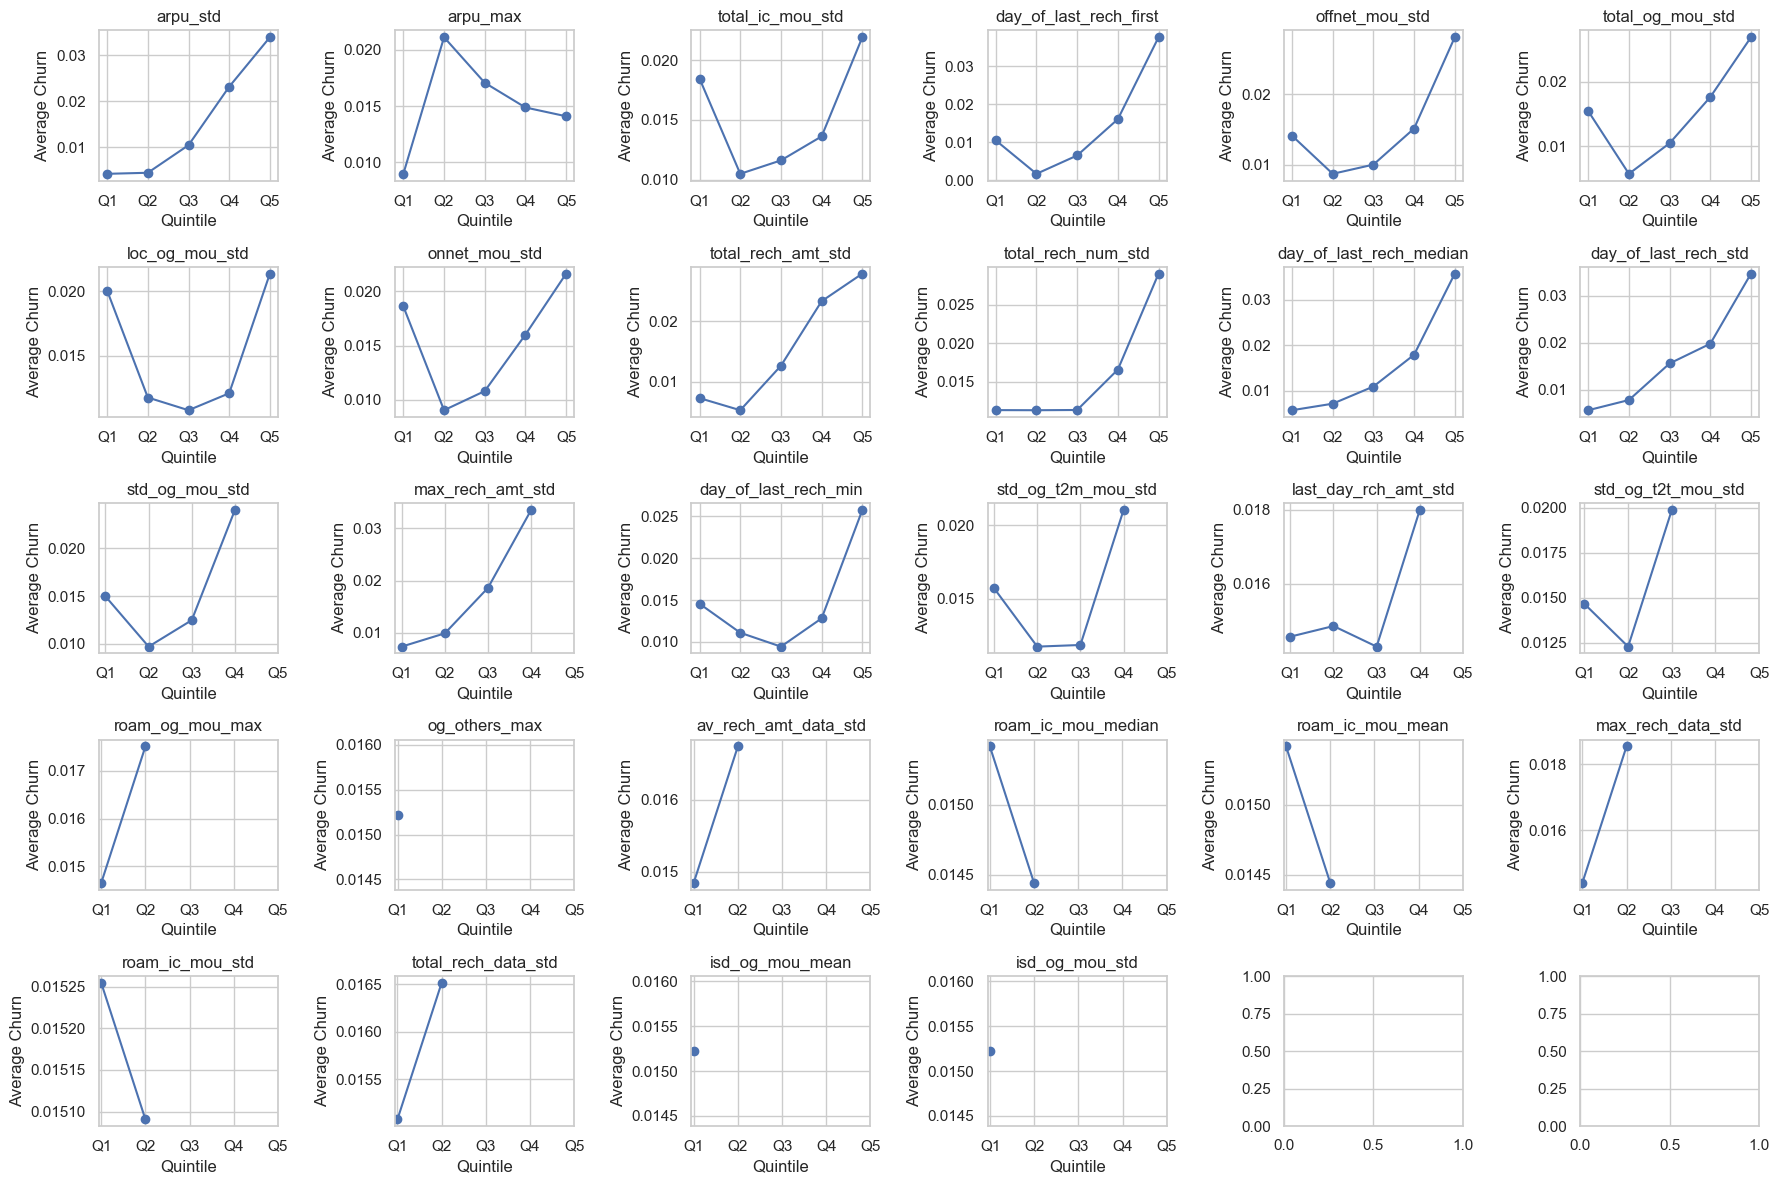

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'universe_train' contains your data and the selected features

# Create quintiles for each feature
for feature in final_features:
    universe_train[feature + '_quintile'] = pd.qcut(universe_train[feature], 5, labels=False, duplicates='drop')

# Calculate the average 'churn' value for each quintile of each feature
quintile_averages = []
for feature in final_features:
    quintile_avg = universe_train.groupby(feature + '_quintile')['churn'].mean()
    quintile_averages.append(quintile_avg)

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 12))

for i, feature in enumerate(final_features):
    row, col = divmod(i, 6)
    ax = axes[row, col]
    ax.plot(quintile_averages[i], marker='o')
    ax.set_title(feature)
    ax.set_xlabel('Quintile')
    ax.set_ylabel('Average Churn')
    ax.set_xticks(range(5))
    ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

plt.tight_layout()
plt.show()

checking the graph with only points

In [77]:
### a lot of 0's
universe_train['og_others_max'].value_counts()

0.000000     82312
0.209961       589
0.429932       218
0.199951       154
0.649902       146
             ...  
9.906250         1
11.992188        1
17.156250        1
31.140625        1
26.656250        1
Name: og_others_max, Length: 1034, dtype: int64

### Modelling Selector

In [ ]:
#!pip install pycaret

In [78]:
from pycaret.classification import *

In [117]:
universe_train['churn'].value_counts()/len(universe_train)

0    0.984778
1    0.015222
Name: churn, dtype: float64

In [118]:
exp1 = setup(data=universe_train[final_features+['churn']], target='churn', session_id=123,fix_imbalance=False)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(99398, 29)"
4,Transformed data shape,"(99398, 29)"
5,Transformed train set shape,"(69578, 29)"
6,Transformed test set shape,"(29820, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [81]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9848,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1830
catboost,CatBoost Classifier,0.9844,0.8730,0.1133,0.4472,0.1780,0.1732,0.2169,21.3960
xgboost,Extreme Gradient Boosting,0.9831,0.8616,0.1416,0.3596,0.2007,0.1939,0.2167,1.0980
lightgbm,Light Gradient Boosting Machine,0.9828,0.8743,0.1397,0.3441,0.1978,0.1907,0.2112,1.2320
et,Extra Trees Classifier,0.9786,0.8587,0.1728,0.2344,0.1980,0.1875,0.1902,8.2480
rf,Random Forest Classifier,0.9782,0.8631,0.1813,0.2307,0.2026,0.1918,0.1934,20.4410
dt,Decision Tree Classifier,0.9558,0.5917,0.2162,0.0926,0.1296,0.1106,0.1213,1.5320
gbc,Gradient Boosting Classifier,0.9334,0.8672,0.4835,0.1116,0.1813,0.1605,0.2090,38.3360
ada,Ada Boost Classifier,0.8848,0.8468,0.5939,0.0766,0.1357,0.1118,0.1834,7.0100
knn,K Neighbors Classifier,0.8773,0.6715,0.3740,0.0479,0.0849,0.0595,0.0980,3.1680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [119]:
rf = create_model('rf')### aplicando smoothe

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9849,0.8562,0.0283,0.6000,0.0541,0.0528,0.1280
1,0.9852,0.8657,0.0472,0.7143,0.0885,0.0868,0.1811
2,0.9851,0.8189,0.0472,0.6250,0.0877,0.0858,0.1689
3,0.9852,0.8435,0.0377,0.8000,0.0721,0.0708,0.1718
4,0.9863,0.8614,0.1321,0.8235,0.2276,0.2244,0.3266
5,0.9865,0.8794,0.1132,1.0000,0.2034,0.2009,0.3342
6,0.9855,0.8457,0.0660,0.7778,0.1217,0.1196,0.2241
7,0.9852,0.8514,0.0377,0.8000,0.0721,0.0708,0.1718
8,0.9853,0.8650,0.0381,0.8000,0.0727,0.0715,0.1727


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
# Create the best model sin smoothe
rf = create_model('rf')
#rf	Random Forest Classifier	0.9782	0.8631	0.1813	0.2307	0.2026	0.1918	0.1934	20.4410

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9789,0.8763,0.1887,0.2469,0.2139,0.2034,0.2053
1,0.9776,0.8626,0.1604,0.2024,0.1789,0.1677,0.1689
2,0.9756,0.8492,0.1415,0.1596,0.1500,0.1377,0.1379
3,0.9780,0.8413,0.1604,0.2099,0.1818,0.1709,0.1725
4,0.9802,0.8958,0.2358,0.3049,0.2660,0.2561,0.2582
5,0.9807,0.8652,0.2547,0.3293,0.2872,0.2776,0.2800
6,0.9757,0.8570,0.1792,0.1881,0.1836,0.1713,0.1713
7,0.9773,0.8580,0.1698,0.2045,0.1856,0.1742,0.1749
8,0.9789,0.8584,0.1429,0.2083,0.1695,0.1592,0.1621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#tuned_rf = tune_model(tuned_rf, optimize='AUC', fold=5, choose_better=True, search_library='optuna', custom_grid = {"eval_metric": ['AUC', 'F1']})

### Model Cliente Final 

In [85]:
#!pip install optuna

In [88]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
# Load your data and split it into features (X) and target (y)
X = universe_train[final_features]
y = universe_train['churn']

In [89]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 150)
    max_depth = trial.suggest_int('max_depth', 5, 10)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Create the Random Forest classifier with the suggested hyperparameters
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf, random_state=42)

    # Perform cross-validation
    f1_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')

    return np.mean(f1_scores)

In [90]:
study = optuna.create_study(direction='maximize')  # Maximize F1-score
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters using the full dataset
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X, y)

[I 2023-10-13 20:35:43,497] A new study created in memory with name: no-name-2471a1a0-8466-4daa-b42d-063431a5808e
[I 2023-10-13 20:35:50,313] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 132, 'max_depth': 9, 'min_samples_split': 0.5404161634092272, 'min_samples_leaf': 0.3424342509711944}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:35:57,728] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 131, 'max_depth': 6, 'min_samples_split': 0.906134644860076, 'min_samples_leaf': 0.39082364637854783}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:36:04,175] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 123, 'max_depth': 6, 'min_samples_split': 0.1972115080756866, 'min_samples_leaf': 0.41108483735211565}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:36:12,365] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 147, 'max_depth': 6, 'min_samples_split': 0.2839690183774299, 'min_samples_leaf': 0.36800878098883394

[I 2023-10-13 20:40:37,760] Trial 35 finished with value: 0.0 and parameters: {'n_estimators': 136, 'max_depth': 7, 'min_samples_split': 0.2000544943748413, 'min_samples_leaf': 0.34178741086795245}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:40:45,037] Trial 36 finished with value: 0.0 and parameters: {'n_estimators': 146, 'max_depth': 8, 'min_samples_split': 0.5027771126854849, 'min_samples_leaf': 0.390161223590243}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:40:52,098] Trial 37 finished with value: 0.0 and parameters: {'n_estimators': 130, 'max_depth': 10, 'min_samples_split': 0.3006963818866867, 'min_samples_leaf': 0.42672989740950346}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:40:59,157] Trial 38 finished with value: 0.0 and parameters: {'n_estimators': 125, 'max_depth': 5, 'min_samples_split': 0.4326713919341281, 'min_samples_leaf': 0.4664670949045653}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:41:16,316] Trial 39 finished with value: 0.0 and paramete

[I 2023-10-13 20:45:04,187] Trial 71 finished with value: 0.0 and parameters: {'n_estimators': 147, 'max_depth': 7, 'min_samples_split': 0.9920250638108286, 'min_samples_leaf': 0.4359689039623225}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:45:10,971] Trial 72 finished with value: 0.0 and parameters: {'n_estimators': 141, 'max_depth': 6, 'min_samples_split': 0.8999886962031362, 'min_samples_leaf': 0.39008695602230725}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:45:18,310] Trial 73 finished with value: 0.0 and parameters: {'n_estimators': 145, 'max_depth': 8, 'min_samples_split': 0.8441887558738049, 'min_samples_leaf': 0.37870292861448795}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:45:26,151] Trial 74 finished with value: 0.0 and parameters: {'n_estimators': 148, 'max_depth': 6, 'min_samples_split': 0.333534746494185, 'min_samples_leaf': 0.40792954206891346}. Best is trial 0 with value: 0.0.
[I 2023-10-13 20:45:32,839] Trial 75 finished with value: 0.0 and paramete

Best Hyperparameters: {'n_estimators': 132, 'max_depth': 9, 'min_samples_split': 0.5404161634092272, 'min_samples_leaf': 0.3424342509711944}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=0.3424342509711944,
                       min_samples_split=0.5404161634092272,
                       min_weight_fraction_leaf=0.0, n_estimators=132,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [109]:
"""RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=0.3424342509711944,
                       min_samples_split=0.5404161634092272,
                       min_weight_fraction_leaf=0.0, n_estimators=132,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)"""

"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=9, max_features='sqrt',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0,\n                       min_samples_leaf=0.3424342509711944,\n                       min_samples_split=0.5404161634092272,\n                       min_weight_fraction_leaf=0.0, n_estimators=132,\n                       n_jobs=None, oob_score=False, random_state=42, verbose=0,\n                       warm_start=False)"

Entrenando el modelo con los indicadores anteriores

In [114]:
### simple search Mean F1 Score on Training Data (Cross-Validation): 0.09080806470731605

Mean F1 Score on Training Data (Cross-Validation): 0.09080806470731605


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 300],
    'max_depth': [-1, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the F1 scorer
f1_scorer = make_scorer(f1_score)

# Create a StratifiedKFold cross-validation object
stratified_cv = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

# Create a RandomizedSearchCV object with stratified cross-validation and verbose output
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   scoring=f1_scorer, n_iter=10, cv=stratified_cv, random_state=42, verbose=50)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X, y)

# Get the best hyperparameters and the corresponding F1 score
best_params = random_search.best_params_
best_f1 = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 1/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 1/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 1/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 1/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5; 1/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=2, n_e

[CV 4/5; 8/10] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.136 total time=  50.8s
[CV 5/5; 8/10] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 5/5; 8/10] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.142 total time=  49.0s
[CV 1/5; 9/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 9/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 9/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 9/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 9/10] START max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 9/10] END max_depth=-1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5;

In [124]:
best_params

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

###### Revisando indicadores en la data OOT del Modelo Cliente

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters
hyperparameters = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': 10
}

# Create a Random Forest classifier with the specified hyperparameters
rf = RandomForestClassifier(**hyperparameters, random_state=42)

# Fit the Random Forest model to your in-sample data (X, y)
rf.fit(X, y)

# Now, let's test the model on the OOT dataset (X_oot)
X_oot = universe_oot[final_features].fillna(0)

# Get predictions (0 or 1) for OOT dataset
predictions = rf.predict(X_oot)

# Get class probabilities for both classes (0 and 1)
class_probabilities = rf.predict_proba(X_oot)

# Class 1 probabilities (churn)
class_1_probabilities = class_probabilities[:, 1]

# Add the churn probabilities and predictions to your OOT dataset
universe_oot['Churn_Probabilities'] = class_1_probabilities
universe_oot['Churn_Predictions'] = predictions


In [126]:
universe_oot.head()

,mobile_number,churn,arpu_mean,arpu_max,arpu_min,arpu_std,arpu_median,arpu_first,onnet_mou_mean,onnet_mou_max,...,fb_user_median,fb_user_first,day_of_last_rech_mean,day_of_last_rech_max,day_of_last_rech_min,day_of_last_rech_std,day_of_last_rech_median,day_of_last_rech_first,Churn_Probabilities,Churn_Predictions
0,7000000074,0,1602.000,1707.000,1497.000,148.492424,1602.000,1707.000,138.000000,164.62500,...,1.0,1.0,2.0,4.0,0.0,2.828427,2.0,4.0,0.004338,0
1,7000000090,0,135.375,173.875,96.875,54.447222,135.375,96.875,19.234375,23.37500,...,0.0,0.0,4.0,8.0,0.0,5.656854,4.0,8.0,0.006957,0
2,7000000126,0,171.250,172.750,169.875,2.032932,171.250,169.875,23.312500,36.53125,...,1.0,1.0,7.0,9.0,5.0,2.828427,7.0,5.0,0.002556,0
3,7000000223,0,403.000,540.500,265.250,194.631142,403.000,540.500,37.562500,67.25000,...,0.0,0.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.007253,0
4,7000000229,0,747.000,769.000,725.000,31.112698,747.000,725.000,33.156250,35.37500,...,0.5,1.0,7.5,12.0,3.0,6.363961,7.5,12.0,0.020842,0


In [129]:
# Calculate and print F1 score on the training data
f1_train = f1_score(y, rf.predict(X))
print("\nTraining Data Metrics:")
print("F1 Score (Training):", f1_train)


Training Data Metrics:
F1 Score (Training): 0.16363636363636364


Indicadores del Modelo en el mes de AGOSTO

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract actual churn values and predicted churn values from your DataFrame
actual_churn = universe_oot['churn']
predicted_churn = universe_oot['Churn_Predictions']
predicted_prob_churn = universe_oot['Churn_Probabilities']

# Calculate classification metrics
accuracy = accuracy_score(actual_churn, predicted_churn)
precision = precision_score(actual_churn, predicted_churn)
recall = recall_score(actual_churn, predicted_churn)
f1 = f1_score(actual_churn, predicted_churn)
auc = roc_auc_score(actual_churn, predicted_prob_churn)
confusion = confusion_matrix(actual_churn, predicted_churn)
confusion_df = pd.DataFrame(confusion, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", confusion_df)

Accuracy: 0.9811727115542118
Precision: 0.7777777777777778
Recall: 0.01487778958554729
F1 Score: 0.029197080291970802
AUC: 0.7751908013272913
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0        97009            8
Actual 1         1854           28


Feature importance

# Modelo 2  CLIENTE - MES

In [137]:
df_train_2 = df_train[df_train['last_date_of_month'].isin(['2014-06','2014-07'])]
df_oot_2 = df_oot[df_oot['last_date_of_month']=='2014-08']

In [146]:
df_train_2['last_date_of_month'].value_counts()

2014-06    99999
2014-07    99398
Name: last_date_of_month, dtype: int64

In [145]:
df_oot_2['last_date_of_month'].value_counts()

2014-08    98899
Name: last_date_of_month, dtype: int64

In [138]:
df_train_2.info() ##last_date_of_month     object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199397 entries, 99999 to 299996
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   last_date_of_month     199397 non-null  object 
 1   arpu                   199397 non-null  float16
 2   onnet_mou              199397 non-null  float16
 3   offnet_mou             199397 non-null  float16
 4   roam_ic_mou            199397 non-null  float16
 5   roam_og_mou            199397 non-null  float16
 6   loc_og_t2t_mou         199397 non-null  float16
 7   loc_og_t2m_mou         199397 non-null  float16
 8   loc_og_t2f_mou         199397 non-null  float16
 9   loc_og_t2c_mou         199397 non-null  float16
 10  loc_og_mou             199397 non-null  float16
 11  std_og_t2t_mou         199397 non-null  float16
 12  std_og_t2m_mou         199397 non-null  float16
 13  std_og_t2f_mou         199397 non-null  float16
 14  std_og_t2c_mou         199397 no

In [139]:
df_train_2.isnull().sum() ## not nulls

last_date_of_month       0
arpu                     0
onnet_mou                0
offnet_mou               0
roam_ic_mou              0
roam_og_mou              0
loc_og_t2t_mou           0
loc_og_t2m_mou           0
loc_og_t2f_mou           0
loc_og_t2c_mou           0
loc_og_mou               0
std_og_t2t_mou           0
std_og_t2m_mou           0
std_og_t2f_mou           0
std_og_t2c_mou           0
std_og_mou               0
isd_og_mou               0
spl_og_mou               0
og_others                0
total_og_mou             0
loc_ic_t2t_mou           0
loc_ic_t2m_mou           0
loc_ic_t2f_mou           0
loc_ic_mou               0
std_ic_t2t_mou           0
std_ic_t2m_mou           0
std_ic_t2f_mou           0
std_ic_t2o_mou           0
std_ic_mou               0
total_ic_mou             0
spl_ic_mou               0
isd_ic_mou               0
ic_others                0
total_rech_num           0
total_rech_amt           0
max_rech_amt             0
last_day_rch_amt         0
t

In [143]:
df_train_2['churn'].value_counts()/len(df_train_2)

0    0.987206
1    0.012794
Name: churn, dtype: float64

In [147]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

def calculate_roc_auc_for_columns_binary(df, target_column, columns_of_interest):
    """
    Calculate ROC AUC scores for specified columns in a DataFrame for binary classification.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_column (str): Name of the binary target column (0 or 1).
    columns_of_interest (list): List of column names to calculate ROC AUC for.

    Returns:
    pd.DataFrame: DataFrame containing the ROC AUC scores for each column.
    """
    roc_auc_scores = {}

    # Calculate ROC AUC for each column
    for col in columns_of_interest:
        target = df[target_column]
        roc_auc = roc_auc_score(target, df[col])
        roc_auc_scores[col] = roc_auc

    # Convert the dictionary to a DataFrame
    roc_auc_df = pd.DataFrame(roc_auc_scores.items(), columns=["Feature", "ROC_AUC"])
    
    return roc_auc_df

# Example usage:
# Assuming your DataFrame is named 'train2' and you want to calculate ROC AUC for specific columns
target_column = 'churn'  # Change this to the name of your binary target column
columns_of_interest = df_train_2.drop(columns=['mobile_number', 'churn','last_date_of_month'], axis=1).columns
roc_auc_df = calculate_roc_auc_for_columns_binary(df_train_2, target_column, columns_of_interest)

# Print or use the DataFrame
roc_auc_df

,Feature,ROC_AUC
0,arpu,0.302894
1,onnet_mou,0.248311
2,offnet_mou,0.233052
3,roam_ic_mou,0.460205
4,roam_og_mou,0.464367
5,loc_og_t2t_mou,0.248856
6,loc_og_t2m_mou,0.230820
7,loc_og_t2f_mou,0.371014
8,loc_og_t2c_mou,0.460361
9,loc_og_mou,0.224391


In [141]:
roc_auc_df[roc_auc_df['ROC_AUC']>=0.5] ### only two variables pass, we'll try other filter selector like Chi-square

,Feature,ROC_AUC
13,std_og_t2c_mou,0.500000
26,std_ic_t2o_mou,0.500000
51,day_of_last_rech,0.674255


Information Value

In [155]:
import pandas as pd
from scipy.stats import chi2_contingency

def calculate_chi_square(df, target_column, variable_name):
    """
    Calculate the Chi-Square statistic and p-value for a variable against the target in a DataFrame for binary classification.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_column (str): Name of the binary target column (0 or 1).
    variable_name (str): Name of the variable for which to calculate the Chi-Square statistic.

    Returns:
    float: Chi-Square statistic
    float: p-value
    """
    contingency_table = pd.crosstab(df[target_column], df[variable_name])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

def calculate_chi_square_values(df, target_column, alpha=0.05):
    """
    Calculate the Chi-Square statistic and p-values for all variables against the target in a DataFrame for binary classification.
    Add a column indicating significance (1 for significant, 0 for not significant).

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_column (str): Name of the binary target column (0 or 1).
    alpha (float): Significance level for p-values.

    Returns:
    pd.DataFrame: DataFrame containing the Chi-Square statistic, p-value, and a significance column for each variable.
    """
    chi_square_scores = {}

    for col in df.columns:
        if col != target_column:
            chi2, p = calculate_chi_square(df, target_column, col)
            significance = 1 if p < alpha else 0
            chi_square_scores[col] = chi2, p, significance

    chi_square_df = pd.DataFrame.from_dict(chi_square_scores, orient='index', columns=['Chi-Square', 'p-value', 'Significance'])

    return chi_square_df

# Example usage:
# Assuming your DataFrame is named 'train2' and you want to calculate Chi-Square statistics and p-values for all variables against the target
target_column = 'churn'  # Change this to the name of your binary target column
alpha = 0.05  # Significance level
chi_square_df = calculate_chi_square_values(df_train_2.drop(columns=['mobile_number','last_date_of_month'], axis=1), 'churn', alpha=0.05)

# Print or use the DataFrame
chi_square_df.head()

,Chi-Square,p-value,Significance
arpu,16279.125159,0.000000e+00,1
onnet_mou,8691.967189,4.288381e-01,0
offnet_mou,12774.562697,4.071608e-160,1
roam_ic_mou,2511.144910,1.000000e+00,0
roam_og_mou,3378.033146,1.000000e+00,0


In [157]:
len(df_train_2.drop(columns=['mobile_number','last_date_of_month'], axis=1).columns)

54

In [156]:
chi_square_df[chi_square_df.Significance>0]

,Chi-Square,p-value,Significance
arpu,16279.125159,0.000000e+00,1
offnet_mou,12774.562697,4.071608e-160,1
loc_og_t2m_mou,8543.699412,1.292620e-12,1
loc_og_mou,8772.777402,1.502552e-04,1
total_og_mou,11160.908597,1.640143e-41,1
loc_ic_t2m_mou,10191.433087,1.058381e-75,1
loc_ic_mou,11251.147626,5.000536e-95,1
total_ic_mou,12456.273998,1.359161e-154,1
spl_ic_mou,224.004179,5.105715e-09,1
total_rech_num,4778.905547,0.000000e+00,1


In [158]:
chi_square_df = chi_square_df.reset_index()
chi_square_df.head()

,index,Chi-Square,p-value,Significance
0,arpu,16279.125159,0.000000e+00,1
1,onnet_mou,8691.967189,4.288381e-01,0
2,offnet_mou,12774.562697,4.071608e-160,1
3,roam_ic_mou,2511.144910,1.000000e+00,0
4,roam_og_mou,3378.033146,1.000000e+00,0


In [166]:
chi_square_df

,index,Chi-Square,p-value,Significance
0,arpu,16279.125159,0.000000e+00,1
1,onnet_mou,8691.967189,4.288381e-01,0
2,offnet_mou,12774.562697,4.071608e-160,1
3,roam_ic_mou,2511.144910,1.000000e+00,0
4,roam_og_mou,3378.033146,1.000000e+00,0
5,loc_og_t2t_mou,5439.046768,1.000000e+00,0
6,loc_og_t2m_mou,8543.699412,1.292620e-12,1
7,loc_og_t2f_mou,1667.954178,1.000000e+00,0
8,loc_og_t2c_mou,1823.999286,1.000000e+00,0
9,loc_og_mou,8772.777402,1.502552e-04,1


In [159]:
chi_square_df['index'].unique()

array(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt',
       'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb',
       'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
       'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'day_of_last_rech', 'day_of_last_rech_data'], dtype=object)

In [160]:
cols_model2 = ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt',
       'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb',
       'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
       'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'day_of_last_rech', 'day_of_last_rech_data']

In [165]:
len(cols_model2)

53

In [163]:
# Create a DataFrame containing only the selected columns
df_train_2_selected = df_train_2[cols_model2]

y_train_2 = df_train_2['churn']

# Initialize a Random Forest classifier
rf_classifier_2 = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the selected features
rf_classifier_2.fit(df_train_2_selected, y_train_2)

# Get feature importances from the trained model
feature_importances_2 = rf_classifier_2.feature_importances_

# Create a DataFrame to store feature importances
importance_df_2 = pd.DataFrame({'Feature': df_train_2_selected.columns, 'Importance': feature_importances_2})

# Sort the DataFrame by feature importance in descending order
importance_df_2 = importance_df_2.sort_values(by='Importance', ascending=False)

# Print or use the importance DataFrame
print(importance_df_2)

                  Feature  Importance
0                    arpu    0.132555
51       day_of_last_rech    0.105613
2              offnet_mou    0.047226
32         total_rech_num    0.047049
22             loc_ic_mou    0.038170
28           total_ic_mou    0.038133
33         total_rech_amt    0.037695
18           total_og_mou    0.032872
1               onnet_mou    0.032729
35       last_day_rch_amt    0.029883
20         loc_ic_t2m_mou    0.029809
34           max_rech_amt    0.027938
9              loc_og_mou    0.025917
3             roam_ic_mou    0.025435
19         loc_ic_t2t_mou    0.024669
6          loc_og_t2m_mou    0.024455
4             roam_og_mou    0.022695
5          loc_og_t2t_mou    0.020647
14             std_og_mou    0.019333
16             spl_og_mou    0.019276
27             std_ic_mou    0.019087
21         loc_ic_t2f_mou    0.018171
11         std_og_t2m_mou    0.016222
24         std_ic_t2m_mou    0.015349
10         std_og_t2t_mou    0.013260
23         s

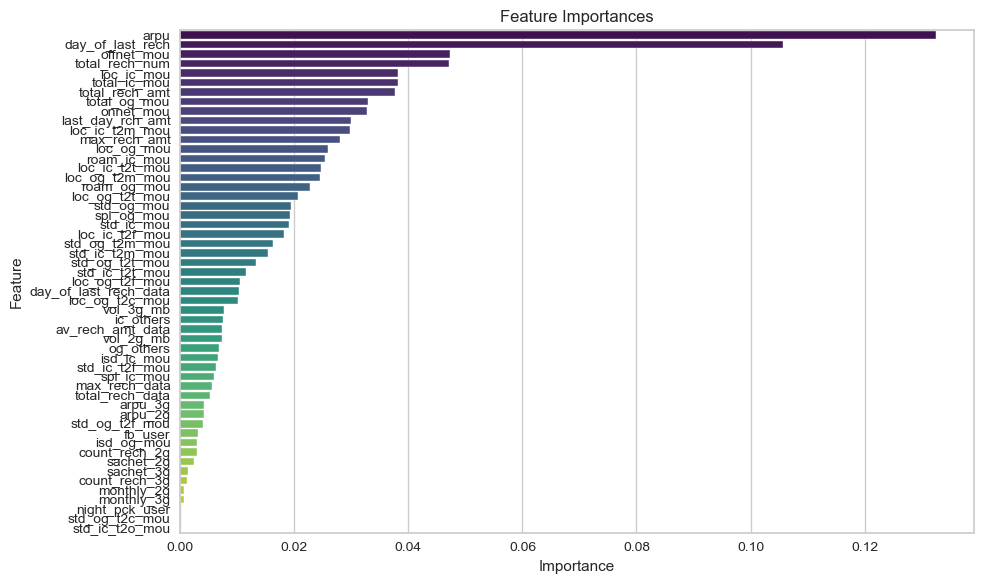

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already created 'importance_df' as in your code

# Sort the DataFrame by feature importance in descending order
importance_df_2 = importance_df_2.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_2, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [167]:
columns_selected = [
    'arpu',
    'day_of_last_rech',
    'offnet_mou',
    'total_rech_num',
    'loc_ic_mou',
    'total_ic_mou',
    'total_rech_amt',
    'total_og_mou',
    'onnet_mou',
    'last_day_rch_amt',
    'loc_ic_t2m_mou',
    'max_rech_amt',
    'loc_og_mou',
    'roam_ic_mou',
    'loc_ic_t2t_mou',
    'loc_og_t2m_mou',
    'roam_og_mou',
    'loc_og_t2t_mou',
    'std_og_mou',
    'spl_og_mou',
    'std_ic_mou',
    'loc_ic_t2f_mou',
    'std_og_t2m_mou',
    'std_ic_t2m_mou',
    'std_og_t2t_mou',
    'std_ic_t2t_mou',
    'loc_og_t2f_mou',
    'day_of_last_rech_data',
    'loc_og_t2c_mou',
    'vol_3g_mb',
    'ic_others',
    'av_rech_amt_data',
    'vol_2g_mb',
    'og_others',
    'isd_ic_mou',
    'std_ic_t2f_mou',
    'spl_ic_mou',
    'max_rech_data',
    'total_rech_data',
    'arpu_3g',
    'arpu_2g',
    'std_og_t2f_mou',
    'fb_user'
]


In [168]:
len(columns_selected)

43

Correlaciones

no filters here

In [170]:
# Calculate the pairwise correlation matrix among the selected features
correlation_matrix = df_train_2[columns_selected+['churn']].corr()

# Identify features with correlation > 0.8 with any other feature
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

# Print or use the highly correlated feature pairs and their correlation values
for pair in highly_correlated_pairs:
    print(f"Features '{pair[0]}' and '{pair[1]}' have correlation: {pair[2]:.2f}")

Features 'total_ic_mou' and 'loc_ic_mou' have correlation: 0.90
Features 'total_rech_amt' and 'arpu' have correlation: 0.95
Features 'loc_ic_t2m_mou' and 'loc_ic_mou' have correlation: 0.82
Features 'loc_og_t2m_mou' and 'loc_og_mou' have correlation: 0.80
Features 'std_og_mou' and 'total_og_mou' have correlation: 0.85
Features 'std_og_t2m_mou' and 'offnet_mou' have correlation: 0.84
Features 'std_ic_t2m_mou' and 'std_ic_mou' have correlation: 0.85
Features 'std_og_t2t_mou' and 'onnet_mou' have correlation: 0.86
Features 'max_rech_data' and 'av_rech_amt_data' have correlation: 0.84
Features 'arpu_3g' and 'av_rech_amt_data' have correlation: 0.80
Features 'arpu_2g' and 'av_rech_amt_data' have correlation: 0.83
Features 'arpu_2g' and 'arpu_3g' have correlation: 0.94


In [179]:
# Calculate the pairwise correlation matrix among the selected features
correlation_matrix = df_train_2[columns_selected + ['churn']].corr()

# Set the correlation threshold (e.g., 0.8)
correlation_threshold = 0.8

# Identify features with correlation > correlation_threshold with any other feature
highly_correlated_columns = set()  # Use a set to store unique column names

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_columns.add(colname_i)
            highly_correlated_columns.add(colname_j)

# Convert the set of highly correlated columns to a list
highly_correlated_columns_list = list(highly_correlated_columns)

# Print or use the list of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns_list)


Highly correlated columns: ['total_rech_amt', 'total_ic_mou', 'std_og_t2t_mou', 'max_rech_data', 'offnet_mou', 'arpu', 'loc_ic_t2m_mou', 'total_og_mou', 'std_og_t2m_mou', 'std_og_mou', 'loc_ic_mou', 'arpu_3g', 'loc_og_mou', 'loc_og_t2m_mou', 'std_ic_mou', 'onnet_mou', 'std_ic_t2m_mou', 'av_rech_amt_data', 'arpu_2g']


In [177]:
final_features = columns_selected

## Model Selected

In [182]:
df_train_2.shape

(199397, 99)

In [180]:
exp2 = setup(data=df_train_2[final_features+['churn']], target='churn', session_id=123,fix_imbalance=False)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(199397, 44)"
4,Transformed data shape,"(199397, 44)"
5,Transformed train set shape,"(139577, 44)"
6,Transformed test set shape,"(59820, 44)"
7,Numeric features,43
8,Preprocess,True
9,Imputation type,simple


In [181]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9883,0.9090,0.1506,0.6983,0.2475,0.2440,0.3205,1.1820
catboost,CatBoost Classifier,0.9883,0.9181,0.1444,0.7124,0.2392,0.2360,0.3164,33.3440
rf,Random Forest Classifier,0.9882,0.8561,0.1607,0.6526,0.2570,0.2533,0.3192,14.0070
et,Extra Trees Classifier,0.9882,0.8554,0.1590,0.6671,0.2561,0.2524,0.3213,10.7250
lightgbm,Light Gradient Boosting Machine,0.9880,0.9124,0.1635,0.6183,0.2575,0.2535,0.3129,1.1700
gbc,Gradient Boosting Classifier,0.9878,0.9093,0.1198,0.6339,0.2009,0.1977,0.2713,27.6450
ada,Ada Boost Classifier,0.9876,0.8869,0.0420,0.7895,0.0789,0.0778,0.1749,6.0500
lr,Logistic Regression,0.9872,0.8244,0.0022,0.1833,0.0044,0.0042,0.0193,9.4600
ridge,Ridge Classifier,0.9872,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2310
dummy,Dummy Classifier,0.9872,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1920


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [183]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9875,0.8957,0.1461,0.5417,0.2301,0.2259,0.2769
1,0.9878,0.9107,0.1788,0.5818,0.2735,0.2691,0.3181
2,0.9887,0.9143,0.2067,0.6981,0.3190,0.3150,0.3760
3,0.9884,0.9188,0.1732,0.6889,0.2768,0.2730,0.3417
4,0.9871,0.9256,0.1341,0.4898,0.2105,0.2062,0.2516
5,0.9888,0.9173,0.1955,0.7447,0.3097,0.3060,0.3781
6,0.9875,0.9049,0.1285,0.5476,0.2081,0.2043,0.2611
7,0.9881,0.9057,0.1236,0.6875,0.2095,0.2064,0.2883
8,0.9878,0.9234,0.1910,0.5667,0.2857,0.2811,0.3244


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [186]:
tuned_lightgbm = tune_model(lightgbm,optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9877,0.8869,0.1011,0.6000,0.1731,0.1700,0.2429
1,0.9883,0.9083,0.1508,0.7105,0.2488,0.2455,0.3240
2,0.9888,0.9126,0.1620,0.8286,0.2710,0.2680,0.3635
3,0.9885,0.9035,0.1508,0.7714,0.2523,0.2492,0.3380
4,0.9880,0.9236,0.1285,0.6571,0.2150,0.2116,0.2871
5,0.9889,0.9204,0.1676,0.8333,0.2791,0.2760,0.3708
6,0.9881,0.9137,0.1341,0.6857,0.2243,0.2210,0.2998
7,0.9882,0.8907,0.1067,0.7917,0.1881,0.1857,0.2881
8,0.9887,0.9202,0.1629,0.7632,0.2685,0.2652,0.3494


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


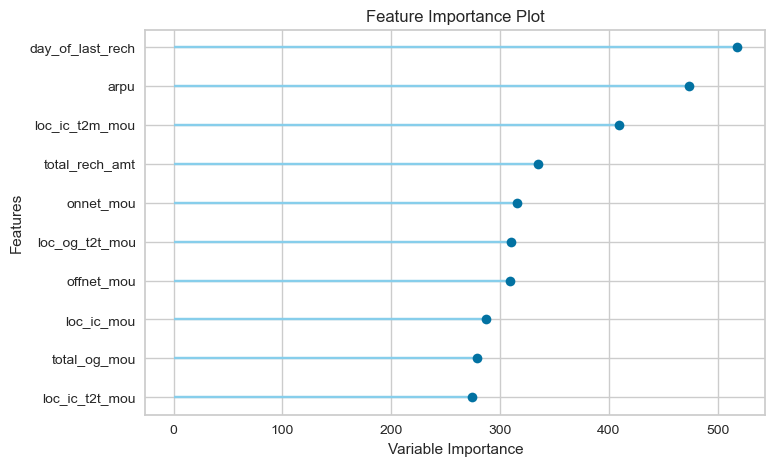

In [185]:
plot_model(tuned_lightgbm, plot='feature')

In [189]:
hyperparameters = lightgbm.get_params()

# Print the hyperparameters
print("Tuned LightGBM Hyperparameters:")
print(hyperparameters)

Tuned LightGBM Hyperparameters:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


## Final Model 2 Cliente-mes

In [194]:
import lightgbm as lgb
X = df_train_2[final_features]
y = df_train_2['churn']


X_predict = df_oot_2[X.columns].copy()

In [192]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42,stratify= y)

In [195]:
train_data = lgb.Dataset(X_train , label=y_train)
test_data = lgb.Dataset(X_test , label=y_test)

In [196]:
train_data = lgb.Dataset(X_train , label=y_train)
test_data = lgb.Dataset(X_test , label=y_test)

In [197]:
parameters = {
    'boosting_type': 'gbdt',
          'max_depth' : 4,
          'objective': 'binary',
          'nthread': 6, 
          'num_leaves': 31,
          'learning_rate': 0.1,
          'max_bin': 512,
          'subsample_for_bin': 2000,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.85,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 0.001,
          'min_child_samples': 20,
          'scale_pos_weight': 1,
          'feature_fraction': 0.85,
          'bagging_fraction': 0.85,
          'num_class' : 1,
          'is_unbalance': 'true',
          'metric' : 'auc',
          'verbose': -1,
          
}

In [200]:
modelo_lgb = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=2000)

In [ ]:
## Feature importance

In [201]:
feature_imp = pd.DataFrame(sorted(zip(modelo_lgb.feature_importance(),X_train.columns)), columns=['Importancia','Variable'])
feature_imp.sort_values(by='Importancia', ascending=False, inplace=True)   

<AxesSubplot:xlabel='Importancia', ylabel='Variable'>

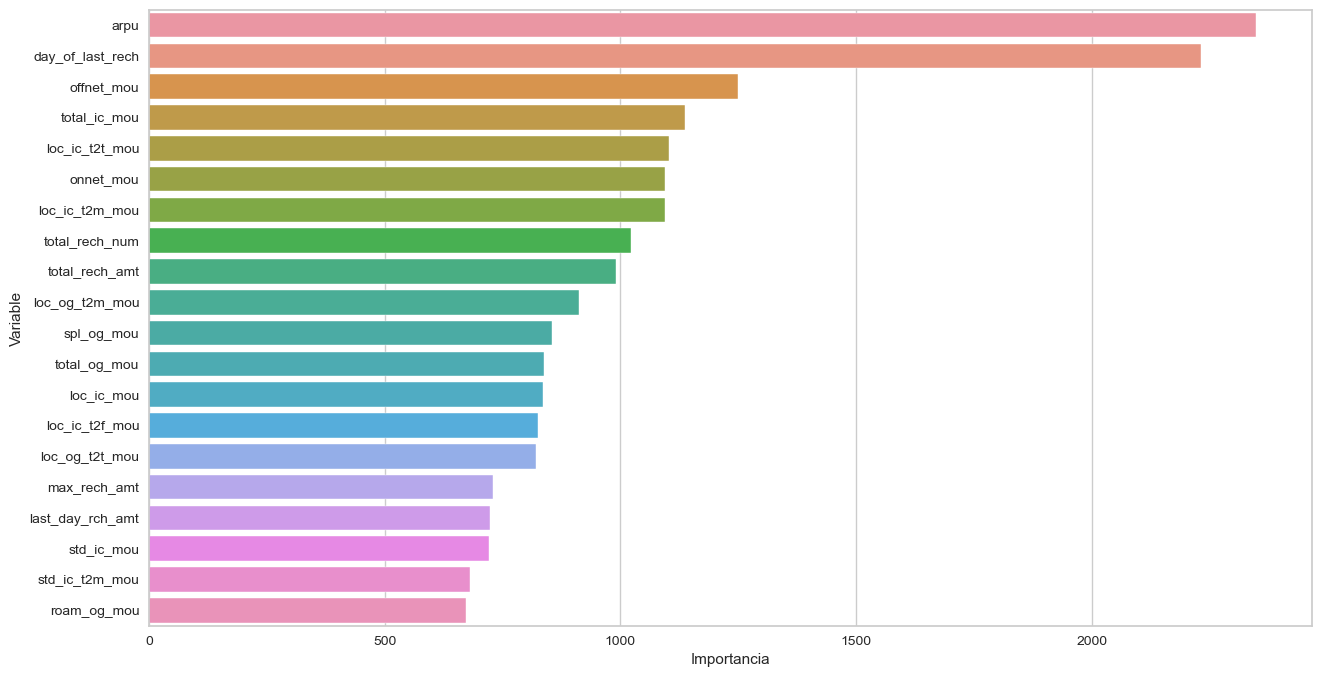

In [202]:
plt.figure(figsize=(15,8))
sns.barplot(x="Importancia", y="Variable", data=feature_imp.head(20))

In [203]:
prediccion_lgb_test = modelo_lgb.predict(X_test, num_iteration=modelo_lgb.best_iteration)
prediccion_lgb_train = modelo_lgb.predict(X_train, num_iteration=modelo_lgb.best_iteration)

In [204]:
prediccion_lgb_submit = modelo_lgb.predict(X_predict, num_iteration=modelo_lgb.best_iteration)

In [205]:
prediccion_lgb_test.min(), prediccion_lgb_test.mean(), prediccion_lgb_test.max()

(4.084810621971069e-10, 0.0445480870540125, 0.9997018671102582)

In [206]:
prediccion_lgb_submit.min(), prediccion_lgb_submit.mean(), prediccion_lgb_submit.max()

(4.181839477587595e-10, 0.054355698178258194, 0.9997011281081722)

In [211]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Define a threshold (e.g., 0.5) 
threshold = 0.5

# Convert probabilities to binary predictions
predictions_test = (prediccion_lgb_test >= threshold).astype(int)
predictions_train = (prediccion_lgb_train >= threshold).astype(int)
predictions_submit = (prediccion_lgb_submit >= threshold).astype(int)

# Calculate F1-score
f1_score_test = f1_score(y_test, predictions_test)
f1_score_train = f1_score(y_train, predictions_train)
f1_score_oot = f1_score(df_oot_2['churn'], predictions_submit)

# Calculate confusion matrix
confusion_matrix_test = confusion_matrix(y_test, predictions_test)
confusion_matrix_train = confusion_matrix(y_train, predictions_train)
confusion_matrix_oot = confusion_matrix(df_oot_2['churn'], predictions_submit)

# Print or use the F1-scores and confusion matrices
print("F1-score (Test):", f1_score_test)
print("F1-score (Train):", f1_score_train)
print("F1-score (OOT):", f1_score_oot)
print("Confusion Matrix (Test):\n", confusion_matrix_test)
print("Confusion Matrix (Train):\n", confusion_matrix_train)
print("Confusion Matrix (oot):\n", confusion_matrix_oot)

F1-score (Test): 0.307797537619699
F1-score (Train): 0.5035950937544057
F1-score (OOT): 0.37775677378701955
Confusion Matrix (Test):
 [[57346  1709]
 [  315   450]]
Confusion Matrix (Train):
 [[134270   3521]
 [     0   1786]]
Confusion Matrix (oot):
 [[93750  3267]
 [  683  1199]]


In [213]:
df_oot_2.shape

(98899, 56)

In [215]:
1199+93750+683+3267

98899

### Explainer shap

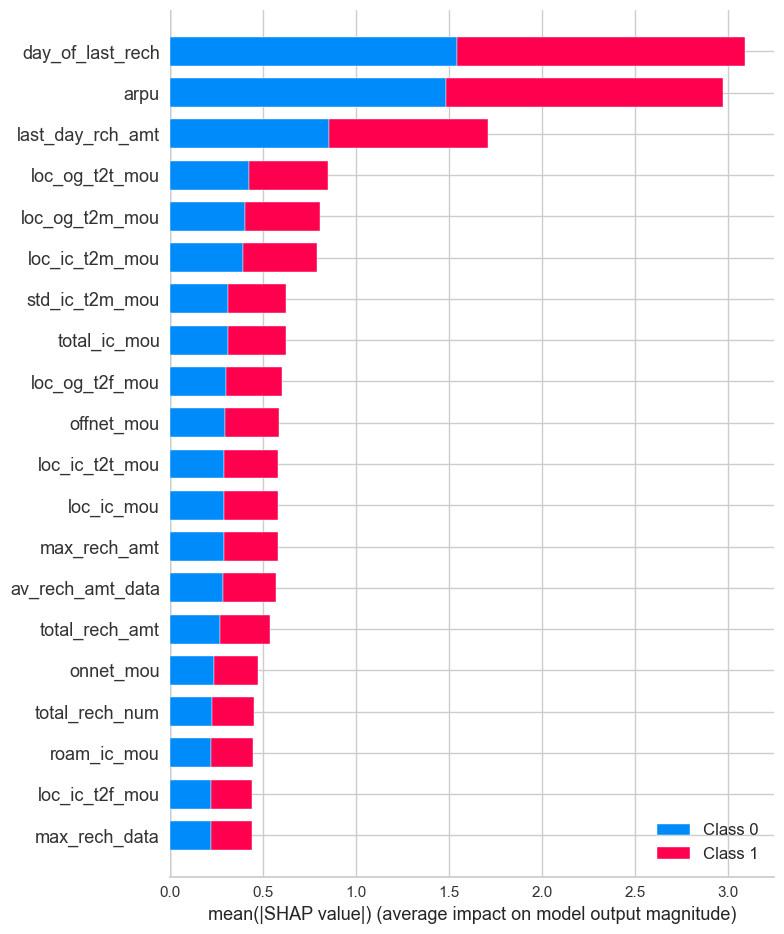

In [217]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer for your LightGBM model
explainer = shap.TreeExplainer(modelo_lgb)

# Get SHAP values for the entire dataset
shap_values = explainer.shap_values(df_train_2[final_features])

# Plot SHAP summary plot
shap.summary_plot(shap_values, df_train_2[final_features])

# Show the plot
plt.show()

In [218]:
### Understanding the arpu

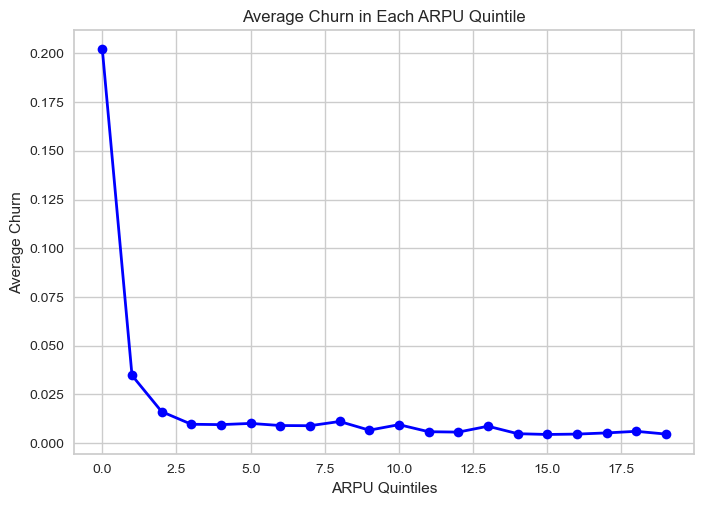

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_oot_2
df_temp = df_oot_2.copy()

# Create quintiles for the 'arpu' column
df_temp['arpu_quintile'] = pd.qcut(df_temp['arpu'], q=20, labels=False)

# Calculate the average of 'churn' for each quintile group
quintile_averages = df_temp.groupby('arpu_quintile')['churn'].mean()

# Create a line plot for the average churn in each quintile
plt.plot(quintile_averages, marker='o', color='blue', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('ARPU Quintiles')
plt.ylabel('Average Churn')
plt.title('Average Churn in Each ARPU Quintile')

# Show the plot
plt.show()


# Anlysis Profile

In [224]:
df_oot_2.head()

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,...,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number,day_of_last_rech,day_of_last_rech_data
0,2014-08,213.750,0.000000,0.0000,0.000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.0,0,0,1,0,1.0,0,7000842753,23.0,23.0
1,2014-08,268.250,7.679688,304.7500,0.000,0.00000,7.679688,291.750000,0.000000,0.00,...,0.0,0,2,0,0,1.0,0,7001865778,3.0,21.0
2,2014-08,210.250,37.250000,208.3750,0.000,0.00000,13.578125,38.468750,15.609375,45.75,...,0.0,0,0,0,0,0.0,0,7001625959,17.0,-1.0
3,2014-08,508.000,311.000000,71.6875,44.375,39.03125,10.609375,22.453125,4.910156,0.00,...,0.0,0,0,0,0,0.0,0,7001204172,0.0,-1.0
4,2014-08,238.125,83.875000,124.2500,0.000,0.00000,83.875000,124.250000,0.000000,0.00,...,0.0,0,0,0,0,0.0,0,7000142493,22.0,-1.0


In [226]:
df_oot_2['predictions_label'] = predictions_submit
df_oot_2['prediccion_prob'] = prediccion_lgb_submit

In [227]:
df_oot_2.head()

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,...,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number,day_of_last_rech,day_of_last_rech_data,predictions_label,prediccion_prob
0,2014-08,213.750,0.000000,0.0000,0.000,0.00000,0.000000,0.000000,0.000000,0.00,...,0,1,0,1.0,0,7000842753,23.0,23.0,0,0.000370
1,2014-08,268.250,7.679688,304.7500,0.000,0.00000,7.679688,291.750000,0.000000,0.00,...,2,0,0,1.0,0,7001865778,3.0,21.0,0,0.000153
2,2014-08,210.250,37.250000,208.3750,0.000,0.00000,13.578125,38.468750,15.609375,45.75,...,0,0,0,0.0,0,7001625959,17.0,-1.0,0,0.000196
3,2014-08,508.000,311.000000,71.6875,44.375,39.03125,10.609375,22.453125,4.910156,0.00,...,0,0,0,0.0,0,7001204172,0.0,-1.0,0,0.000185
4,2014-08,238.125,83.875000,124.2500,0.000,0.00000,83.875000,124.250000,0.000000,0.00,...,0,0,0,0.0,0,7000142493,22.0,-1.0,0,0.070828


In [232]:
df_oot_2['prediccion_prob_groups'] = pd.qcut(df_oot_2['prediccion_prob'], q=3, labels=['Low_prob', 'Medium_prob', 'High_prob'])

In [233]:
df_oot_2['prediccion_prob_groups'].value_counts()

Low_prob       32967
Medium_prob    32966
High_prob      32966
Name: prediccion_prob_groups, dtype: int64

In [234]:
df_oot_2.groupby('prediccion_prob_groups')['churn'].mean()

prediccion_prob_groups
Low_prob       0.001274
Medium_prob    0.002821
High_prob      0.052994
Name: churn, dtype: float64

In [ ]:
day_of_last_rech
arpu
last_day_rch_amt
loc_og_t2t_mou
loc_og_t2m_mou

In [239]:
import pandas as pd

# Assuming you have a DataFrame named df_temp2_oot_2
df_temp2 = df_oot_2.copy()

# List of variables for which you want to create quintiles and calculate average churn
variables = ['day_of_last_rech', 'arpu', 'last_day_rch_amt', 'loc_og_t2t_mou', 'loc_og_t2m_mou']

# Loop through the list of variables
for variable in variables:
    # Create quintiles for the variable
    df_temp2['{}_quintile'.format(variable)] = pd.qcut(df_temp2[variable], q=5,duplicates='drop')

In [240]:
df_temp2.head()

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,...,day_of_last_rech,day_of_last_rech_data,predictions_label,prediccion_prob,prediccion_prob_groups,day_of_last_rech_quintile,arpu_quintile,last_day_rch_amt_quintile,loc_og_t2t_mou_quintile,loc_og_t2m_mou_quintile
0,2014-08,213.750,0.000000,0.0000,0.000,0.00000,0.000000,0.000000,0.000000,0.00,...,23.0,23.0,0,0.000370,Medium_prob,"(7.0, 30.0]","(148.375, 250.375]","(130.0, 4449.0]","(-0.001, 5.379]","(-0.001, 3.279]"
1,2014-08,268.250,7.679688,304.7500,0.000,0.00000,7.679688,291.750000,0.000000,0.00,...,3.0,21.0,0,0.000153,Low_prob,"(1.0, 3.0]","(250.375, 431.0]","(20.0, 44.0]","(5.379, 17.656]","(130.125, 4960.0]"
2,2014-08,210.250,37.250000,208.3750,0.000,0.00000,13.578125,38.468750,15.609375,45.75,...,17.0,-1.0,0,0.000196,Low_prob,"(7.0, 30.0]","(148.375, 250.375]","(44.0, 130.0]","(5.379, 17.656]","(22.516, 56.062]"
3,2014-08,508.000,311.000000,71.6875,44.375,39.03125,10.609375,22.453125,4.910156,0.00,...,0.0,-1.0,0,0.000185,Low_prob,"(-1.001, 1.0]","(431.0, 33536.0]","(44.0, 130.0]","(5.379, 17.656]","(3.279, 22.516]"
4,2014-08,238.125,83.875000,124.2500,0.000,0.00000,83.875000,124.250000,0.000000,0.00,...,22.0,-1.0,0,0.070828,High_prob,"(7.0, 30.0]","(148.375, 250.375]","(44.0, 130.0]","(49.688, 10752.0]","(56.062, 130.125]"


In [242]:
df_temp2.groupby(['prediccion_prob_groups','arpu_quintile'])['mobile_number'].count().reset_index()

,prediccion_prob_groups,arpu_quintile,mobile_number
0,Low_prob,"(-946.001, 68.25]",4398
1,Low_prob,"(68.25, 148.375]",5586
2,Low_prob,"(148.375, 250.375]",6453
3,Low_prob,"(250.375, 431.0]",7706
4,Low_prob,"(431.0, 33536.0]",8824
5,Medium_prob,"(-946.001, 68.25]",4424
6,Medium_prob,"(68.25, 148.375]",6939
7,Medium_prob,"(148.375, 250.375]",7401
8,Medium_prob,"(250.375, 431.0]",7295
9,Medium_prob,"(431.0, 33536.0]",6907


In [251]:
import pandas as pd

# Assuming you have a DataFrame named df_temp2
# Group by 'prediccion_prob_groups' and 'arpu_quintile' and calculate the count of 'mobile_number'
grouped_counts = df_temp2.groupby(['prediccion_prob_groups', 'day_of_last_rech_quintile'])['mobile_number'].count().reset_index()

# Calculate the total count of 'mobile_number' within each 'prediccion_prob_groups' group
total_counts = grouped_counts.groupby('prediccion_prob_groups')['mobile_number'].transform('sum')

# Calculate the percentage by dividing the count by the total count
grouped_counts['percentage'] = (grouped_counts['mobile_number'] / total_counts) * 100

# Add the name of the variable you're analyzing in a new column
grouped_counts['variable'] = 'day_of_last_rech_quintile'  # Change 'arpu_quintile' to the appropriate variable name

# Display the result
grouped_counts

,prediccion_prob_groups,day_of_last_rech_quintile,mobile_number,percentage,variable
0,Low_prob,"(-1.001, 1.0]",15346,46.549580,day_of_last_rech_quintile
1,Low_prob,"(1.0, 3.0]",8286,25.134225,day_of_last_rech_quintile
2,Low_prob,"(3.0, 5.0]",3184,9.658143,day_of_last_rech_quintile
3,Low_prob,"(5.0, 7.0]",2353,7.137440,day_of_last_rech_quintile
4,Low_prob,"(7.0, 30.0]",3798,11.520612,day_of_last_rech_quintile
5,Medium_prob,"(-1.001, 1.0]",9281,28.153249,day_of_last_rech_quintile
6,Medium_prob,"(1.0, 3.0]",7720,23.418067,day_of_last_rech_quintile
7,Medium_prob,"(3.0, 5.0]",5644,17.120670,day_of_last_rech_quintile
8,Medium_prob,"(5.0, 7.0]",5035,15.273312,day_of_last_rech_quintile
9,Medium_prob,"(7.0, 30.0]",5286,16.034702,day_of_last_rech_quintile


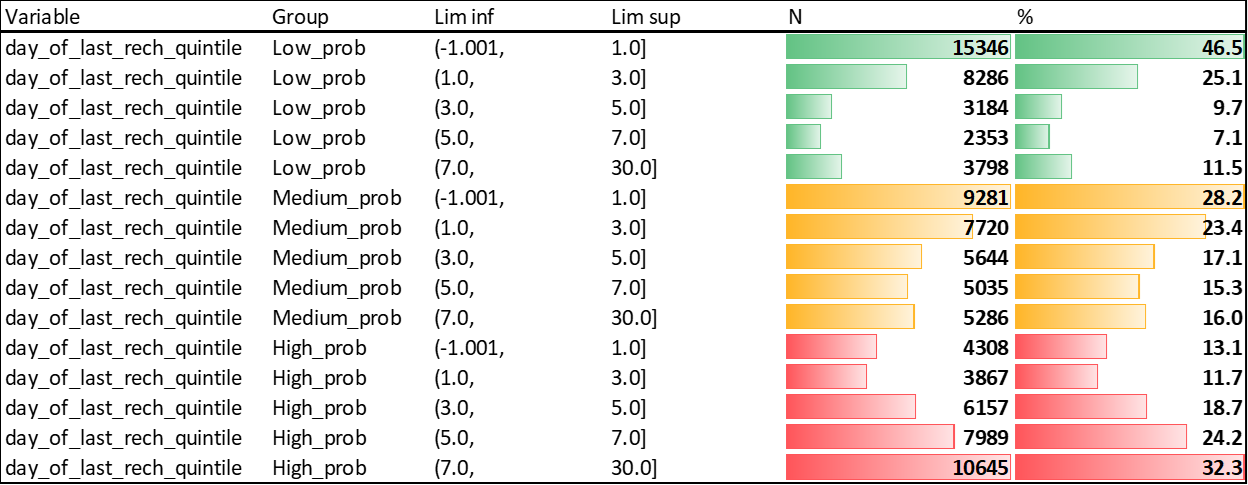

## Return on Investment - ROI 

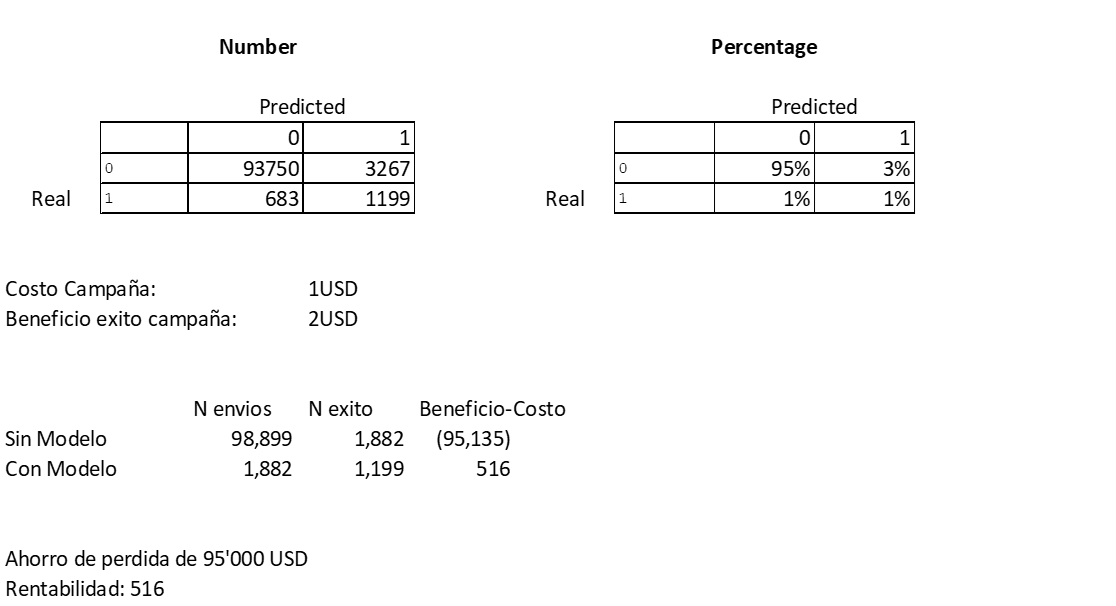

# Respondiendo la consulta de esta pregunta

In [257]:
## Consultas

a. ¿Qué métricas usaste para evaluar el desempeño del modelo? ¿Por qué?

b. ¿Cómo podrías mejorar la performance del modelo?

c. ¿Por qué elegiste este modelo

In [258]:
## Respuestas:

a. La metrica a usar sería el F1-score debido a la data desbalanceada.

b. Mejoran teniendo más historia para usar comportamiento histórico

c. Debido a que presenta mejor F1-score con respecto al resto de modelos

## Conclusiones

1. Generando el modelo con la metodologia cliente - mes, trae mejores resultados debido a la cantidad de observaciones
2. Las variables top 5 más importantes son: 
- 'day_of_last_rech': dia desde su ultima recarga
- 'arpu', average revenue per client
- 'last_day_rch_amt', monto de su ultima recarga amt
- 'loc_og_t2t_mou', local call outgoing to i.e. operator in minutes of use
- 'loc_og_t2m_mou',local call outgoing to other operator in minutes of use

4. El uso de un campaña con hip: con costo 1usd y beneficio 2usd, evidencia la ganancia del modelo en el negocio.
5. Se plantea realizar un a/b testing al grupo con mayor prob de churn para poder probar distintos incentivos